In [49]:
import pandas as pd
import numpy as np
# python3 -m venv myenv
# source myenv/bin/activate


# Where are the shortages in mental health care? 
# Where and how are young people lacking mental health services? 
# What demographics are most lacking mental health care and services?
# Where do they live?
# What is there race?
# What is there income level?
# What types of services are young people not using? 
# What services are actually helping young people?
# Figure out what resources that youth are actually using

# Data:
# Look at national Findtreatment data of mental health facilities that are available to children/young people
# Look at the types of care that these findtreatment data represent
# Look at the types of insurance accepted types that these findtreatment data respresent
# Look at, in general, which counties/regions are lacking the most mental health facilities
# Then look at those counties and regions in light of the population density // what is lacking the most services relative to the amount of young people in that region? (get from census data)
# Look at these available services in light of the population densities that actually have mental illness






In [7]:
usa_data = pd.read_csv('new_USA_FindTreatment_MH_SUD_2_19_2024_acronymfree.csv')

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/3965890487.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  usa_data = pd.read_csv('new_USA_FindTreatment_MH_SUD_2_19_2024_acronymfree.csv')


In [8]:
usa_data.columns

Index(['Unnamed: 0', 'name1', 'name2', 'street1', 'street2', 'city', 'state',
       'zip', 'zip4', 'county',
       ...
       'Arabic', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese',
       'Russian', 'Tagalog', 'Vietnamese', 'Ojibwa'],
      dtype='object', length=325)

/Users/charosa/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


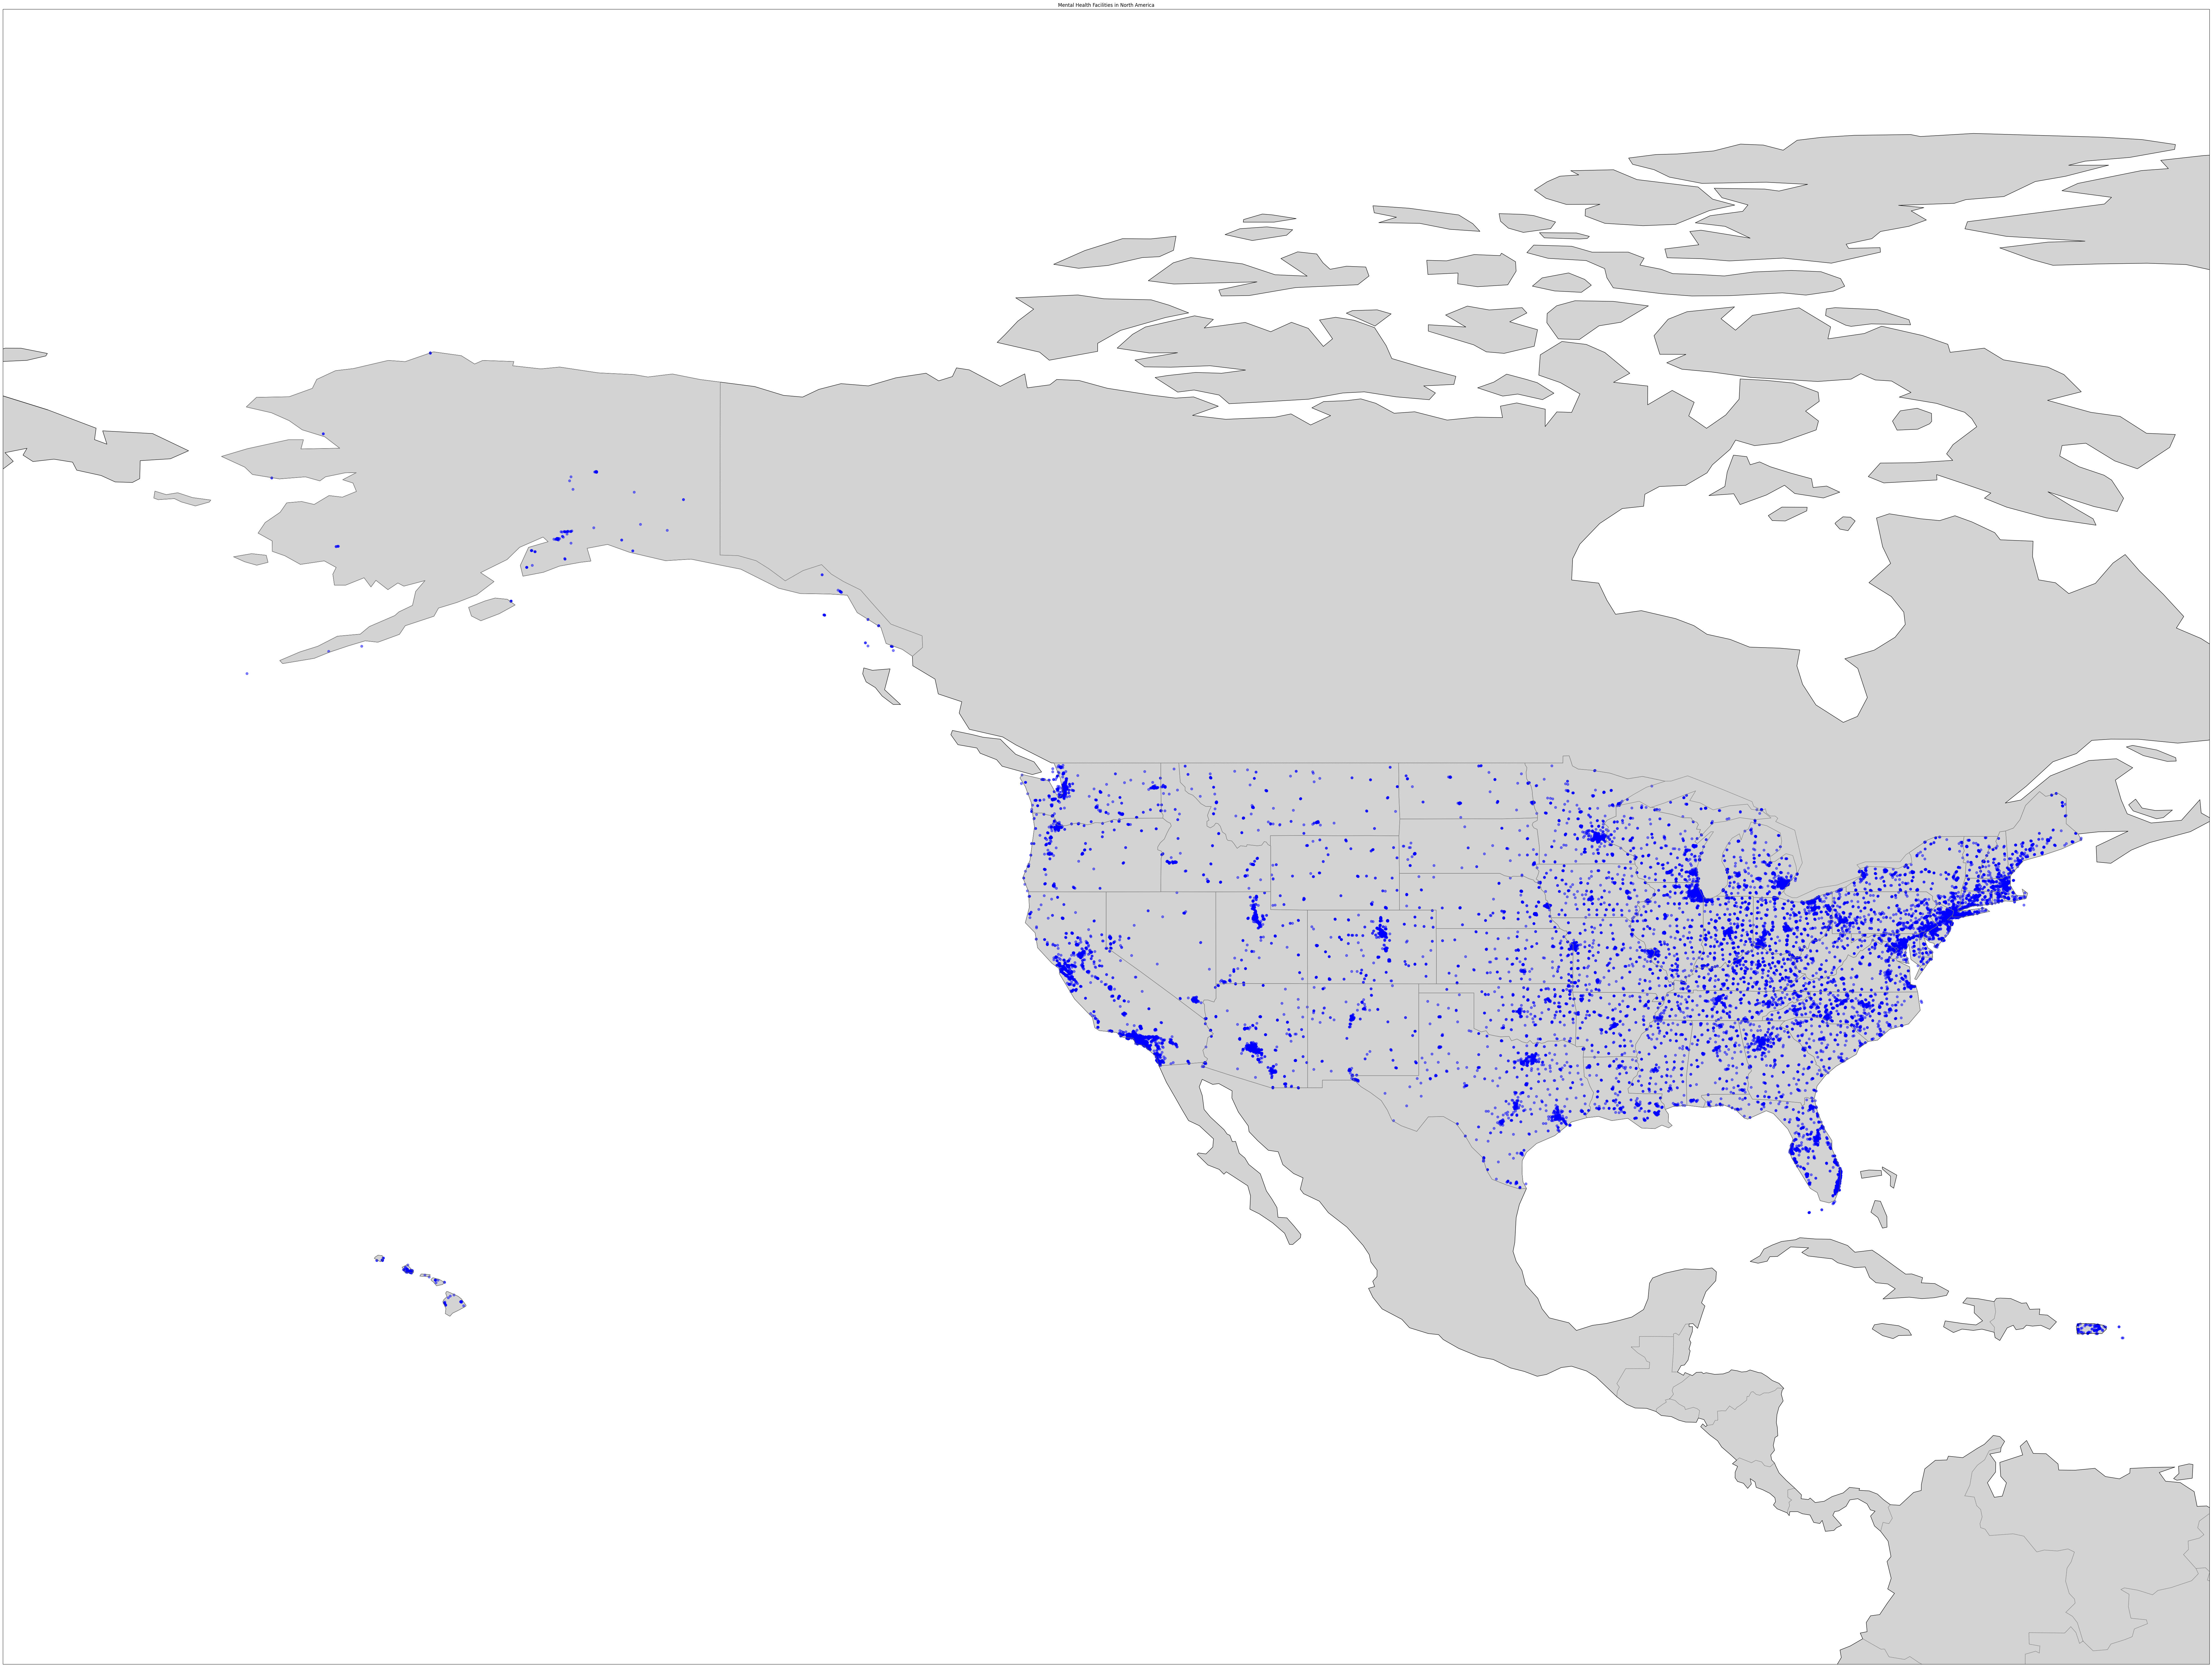

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming usa_data contains latitude and longitude columns
# Extract latitude and longitude columns
latitude = usa_data['latitude']
longitude = usa_data['longitude']

# Create a Cartopy map with PlateCarree projection
plt.figure(figsize=(100, 80))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on North America
ax.set_extent([-180, -60, 0, 110], crs=ccrs.PlateCarree())

# Draw coastlines, countries, states, and state borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Change land color

# Plot points on the map
ax.scatter(longitude, latitude, color='blue', marker='o', alpha=0.5)

# Show the plot
plt.title('Mental Health Facilities in North America')
plt.show()



/Users/charosa/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/charosa/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/charosa/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/charosa/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', Dow

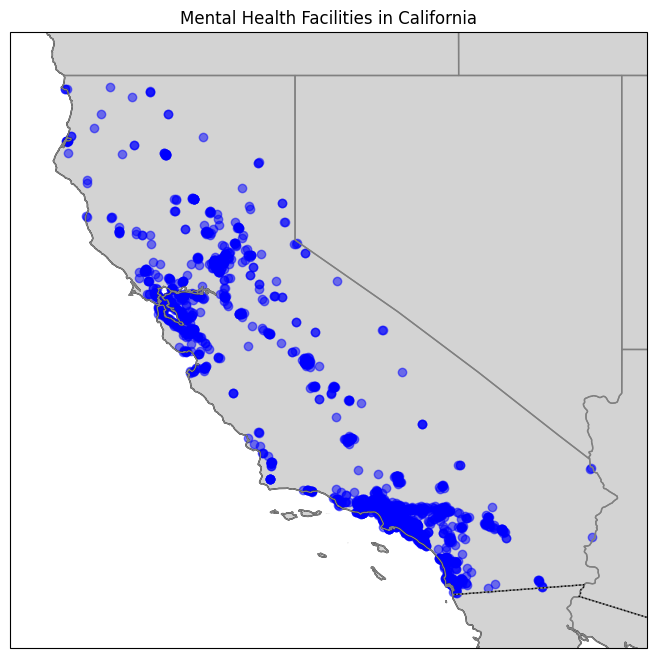

In [36]:
filtered_usa_df = usa_data[usa_data['state'] == 'CA']

# Assuming usa_data contains latitude and longitude columns
# Extract latitude and longitude columns
latitude = filtered_usa_df['latitude']
longitude = filtered_usa_df['longitude']

# Create a Cartopy map with PlateCarree projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on California
min_lon, max_lon = longitude.min(), longitude.max()
min_lat, max_lat = latitude.min(), latitude.max()
ax.set_extent([min_lon - 1, max_lon + 1, min_lat - 1, max_lat + 1], crs=ccrs.PlateCarree())

# Draw coastlines, states, and state borders
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='gray')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot points on the map
ax.scatter(longitude, latitude, color='blue', marker='o', alpha=0.5)

# Show the plot
plt.title('Mental Health Facilities in California')
plt.show()


Unnamed: 0                                 name1  \
15876       15876             Mental Health Systems Inc   
15884       15884      Needles Behavioral Health Clinic   
16214       16214  Veterans Alcoholic Rehab Prog (VARP)   
17291       17291                    County of Imperial   
17294       17294                    County of Imperial   
...           ...                                   ...   
23696       23696            County of Humboldt DHHS BH   
23697       23697            County of Humboldt DHHS BH   
23700       23700         United Indian Health Services   
23713       23713    Del Norte County Behavioral Health   
23714       23714                      HASP DUI Program   

                                        name2             street1    street2  \
15876               Needles Center for Change        300 H Street        NaN   
15884               San Bernardino County DBH  1600 Bailey Avenue    Suite 2   
16214                  Metcalf Recovery Ranch    9826 18th Avenue        NaN   
17291  Calexico Adolescent SUD Treatment Prog  101 Hacienda Drive    Suite B   
17294    Calexico Adult SUD Treatment Program  25 East 3rd Street        NaN   
...                                       ...                 ...        ...   
23696            Adolescent Treatment Program        134 D Street  Suite 101   
23697   Humboldt County Programs for Recovery      231 2nd Street        NaN   
23700                       Behavioral Health  2298 Norris Avenue    Suite A   
23713                                     NaN        455 K Street        NaN   
23714                                     NaN        349 G Street        NaN   

                city state    zip zip4          county  ... Arabic Italian  \
15876        Needles    CA  92363  NaN  San Bernardino  ...    NaN     NaN   
15884        Needles    CA  92363  NaN  San Bernardino  ...    NaN     NaN   
16214         Blythe    CA  92225  NaN       Riverside  ...    NaN     NaN   
17291       Calexico    CA  92231  NaN        Imperial  ...    NaN     NaN   
17294       Calexico    CA  92231  NaN        Imperial  ...    NaN     NaN   
...              ...   ...    ...  ...             ...  ...    ...     ...   
23696         Eureka    CA  95501  NaN        Humboldt  ...    NaN     NaN   
23697         Eureka    CA  95501  NaN        Humboldt  ...    NaN     NaN   
23700  Crescent City    CA  95531  NaN       Del Norte  ...    NaN     NaN   
23713  Crescent City    CA  95531  NaN       Del Norte  ...    NaN     NaN   
23714  Crescent City    CA  95531  NaN       Del Norte  ...    NaN     NaN   

      Japanese Korean Polish  Portuguese  Russian Tagalog  Vietnamese  Ojibwa  
15876      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
15884      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
16214      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
17291      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
17294      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
...        ...    ...    ...         ...      ...     ...         ...     ...  
23696      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
23697      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
23700      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
23713      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
23714      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  

[2185 rows x 325 columns]

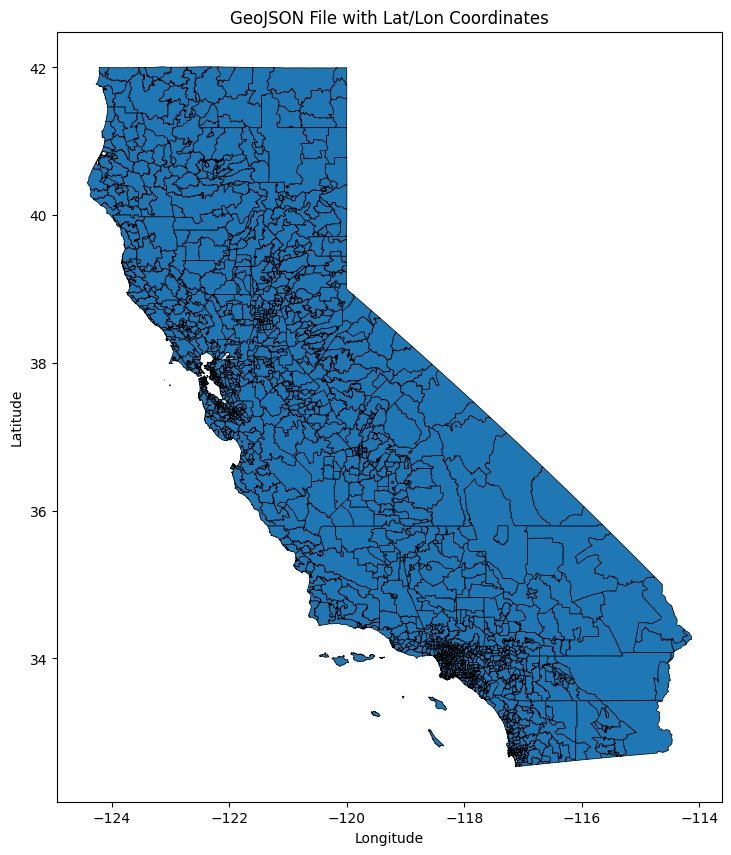

In [37]:
## cal zip codes


import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

geojson_path = 'California_Zip_Codes.geojson'

gdf = gpd.read_file(geojson_path)

gdf = gdf.set_geometry('geometry')

transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

gdf = gdf.to_crs("EPSG:4326")

gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [57]:
# reading the sahpefile for california counties
!pip install contextily

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import contextily as ctx 
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

path = "ca_county_boundaries/ca_county_boundaries.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 6.6 MB/s eta 0:00:00


/Users/charosa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [77]:
df['NAME']

0              Sierra
1          Sacramento
2       Santa Barbara
3           Calaveras
4             Ventura
5         Los Angeles
6              Sonoma
7               Kings
8           San Diego
9              Placer
10      San Francisco
11              Marin
12           Mariposa
13             Lassen
14               Napa
15             Shasta
16           Monterey
17            Trinity
18          Mendocino
19               Inyo
20               Mono
21           Tuolumne
22             Solano
23     San Bernardino
24       Contra Costa
25             Alpine
26          El Dorado
27               Yolo
28               Yuba
29         San Benito
30           Humboldt
31          Riverside
32               Kern
33             Colusa
34          Del Norte
35              Modoc
36             Fresno
37             Madera
38        Santa Clara
39             Tehama
40        San Joaquin
41            Alameda
42             Nevada
43              Butte
44             Merced
45        

In [58]:
# just looking at one county in isolation
df.iloc[0,:]


STATEFP                                                      06
COUNTYFP                                                    091
COUNTYNS                                               00277310
GEOID                                                     06091
GEOIDFQ                                          0500000US06091
NAME                                                     Sierra
NAMELSAD                                          Sierra County
LSAD                                                         06
CLASSFP                                                      H1
MTFCC                                                     G4020
CSAFP                                                      None
CBSAFP                                                     None
METDIVFP                                                   None
FUNCSTAT                                                      A
ALAND                                              2468694578.0
AWATER                                  

<Axes: >

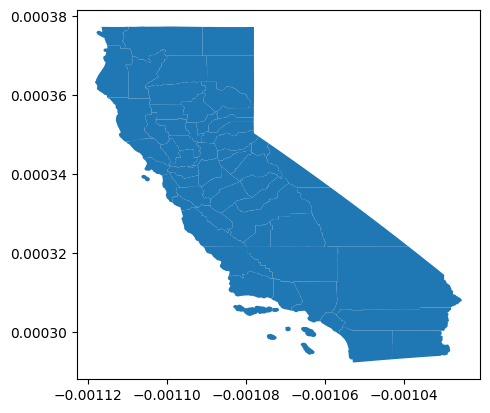

In [59]:
df.plot()


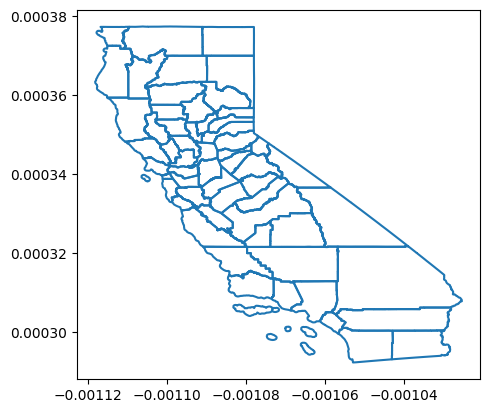

In [60]:
df.boundary.plot()
plt.show()

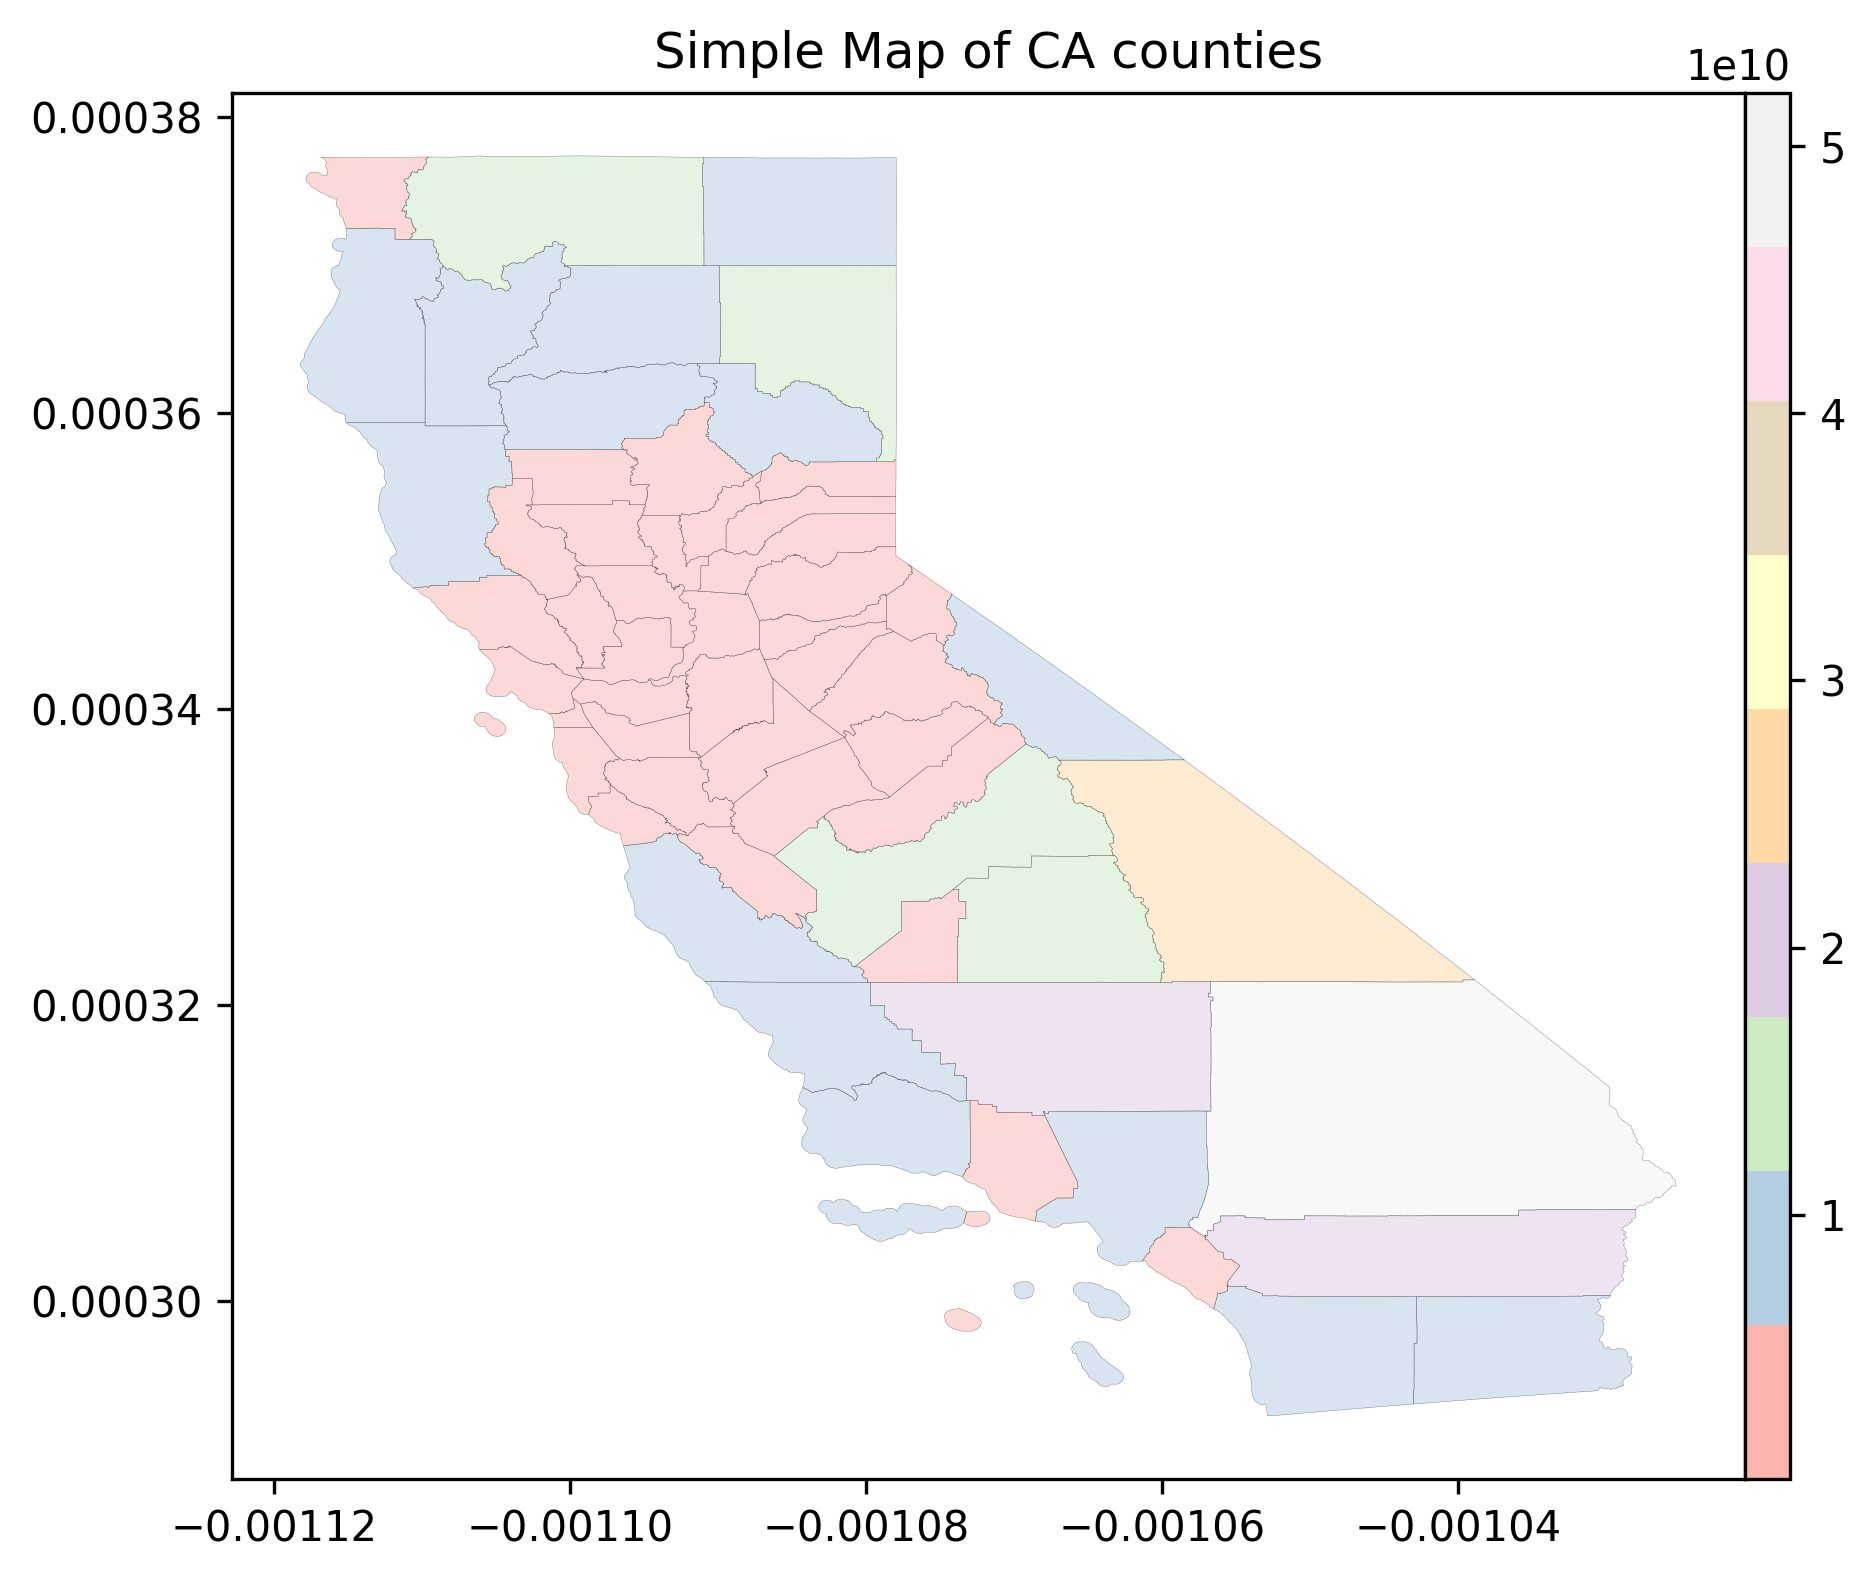

In [63]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Simple Map of CA counties')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df.plot('ALAND', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()

In [64]:
df['ALAND_miles'] = df['ALAND']*3.86102e-7
df['AWATER_miles'] = df['AWATER']*3.86102e-7
df['centroid'] = df.centroid

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/1970209629.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid'] = df.centroid


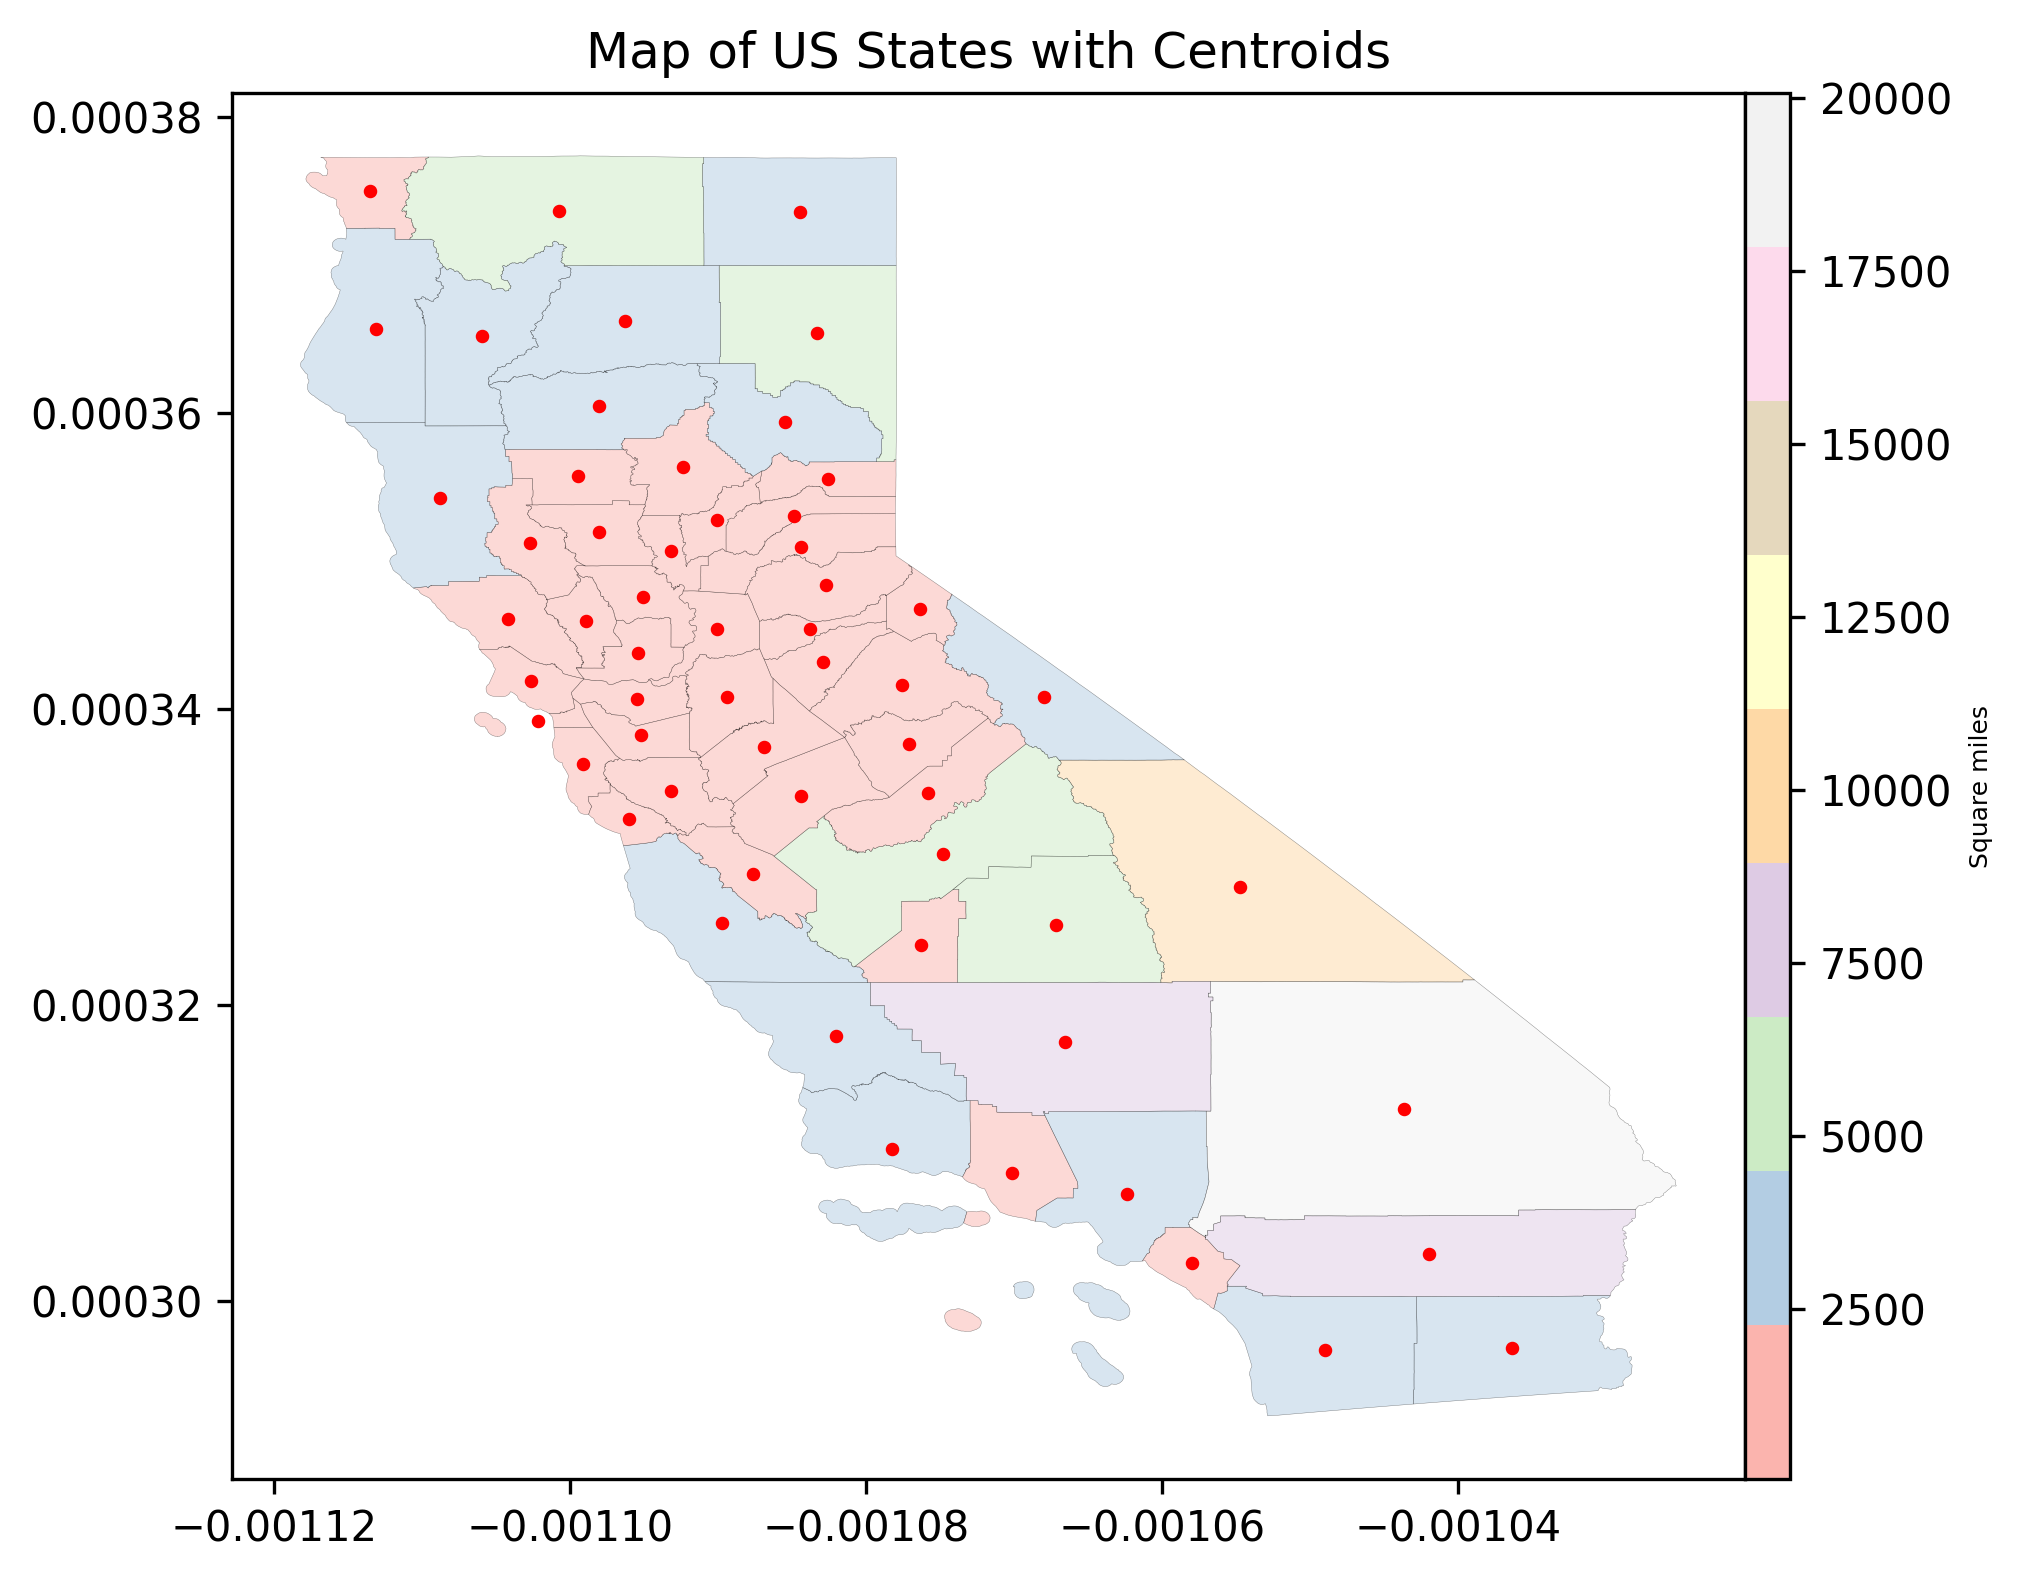

In [65]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Map of ca counties with Centroids')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
df.plot('ALAND_miles', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1,label='Inline label')
plt.ylabel('Square miles', fontsize=6)
df['centroid'].plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

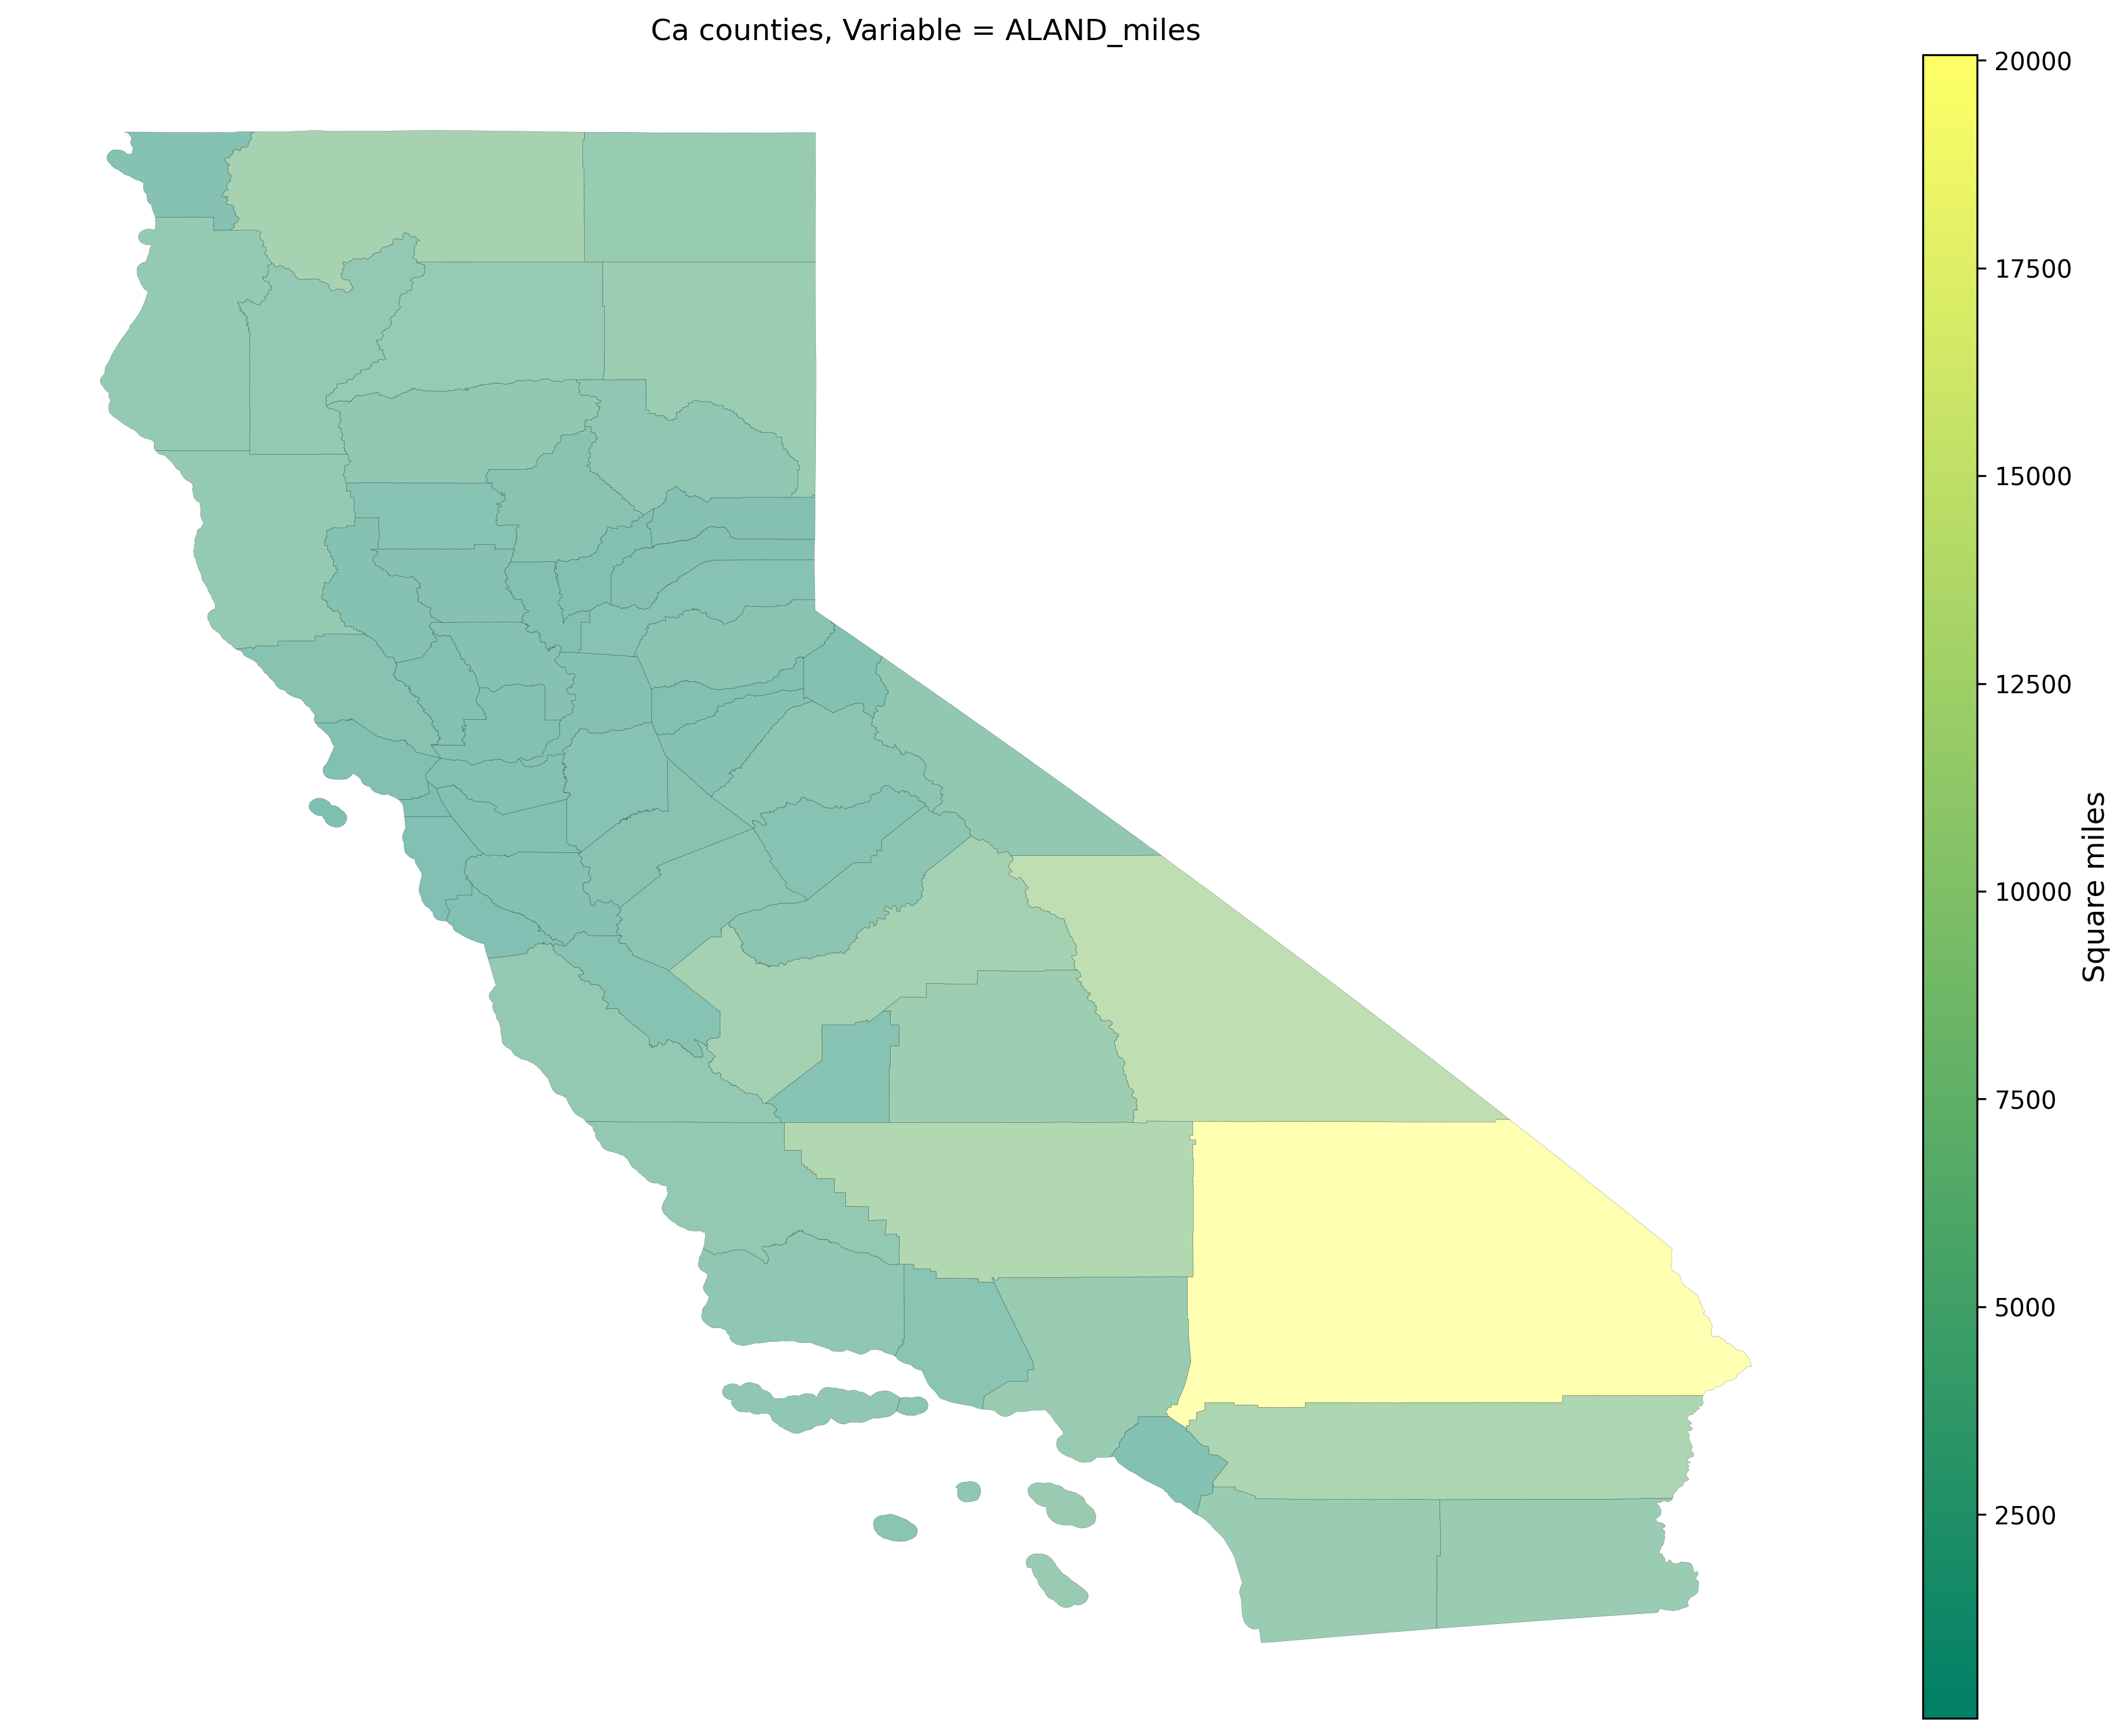

In [72]:
data = 'ALAND_miles'
cmap = 'summer'
f,ax = plt.subplots(1,1, figsize=(15,10), 
sharex=True, sharey=True, dpi=300)
f.tight_layout()
plt.title('Ca counties, Variable = ' + data)
ax.set_axis_off()
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", 
pad=0.5,alpha=0.5)

df.plot(data, ax=ax, alpha=0.5, cmap=cmap, 
edgecolor='k', legend=True, cax=cax, linewidth=0.1)





plt.ylabel('Square miles', fontsize=12)
plt.show()
    





In [91]:
# now zooming into california in particular:
# https://datatools.samhsa.gov/saes/data/substate/substate_region_definitions_2016-2018.pdf

# 5.65% - 7.06%
# 5.17% - 5.64%
# 4.64% - 5.16%
# 4.19% - 4.63%
# 3.80% - 4.18%
# 3.43% - 3.79%
# 3.05% - 3.42%

# looking at received mental illness in light of the number of mental heatlh facilities available
region_names = {
        'California Region 1R': ['Butte', 'Colusa', 'Del Norte', 'Glenn', 'Humboldt', 'Lake', 'Lassen', 'Mendocino', 'Modoc', 'Plumas', 'Shasta', 'Sierra', 'Siskiyou', 'Tehama', 'Trinity'],
        'California Region 2R': ['El Dorado', 'Nevada', 'Placer', 'Sutter', 'Yolo', 'Yuba'],
        'California Region 3R (Sacramento)':['Sacramento'],
        'California Region 4R': ['Marin', 'Napa', 'Solano', 'Sonoma'],
        'California Region 5R (San Francisco)': ['San Francisco'],
        'California Region 6 (Santa Clara)': ['Santa Clara'], # California Region 6 (Santa Clara)
        'California Region 7R (Contra Costa)': ['Contra Costa'],
        'California Region 8R (Alameda)': ['Alameda'],
        'California Region 9R (San Mateo)': ['San Mateo'],
        'California Region 10': ['Santa Barbara', 'Ventura'],
        'California Region 11 (Los Angeles)': ['Los Angeles'], # this has multiple things
        'California Region 12R': ['Alpine', 'Amador', 'Calaveras', 'Mono', 'San Joaquin', 'Tuolumne'],
        'California Regions 13 and 19R': ['Imperial', 'Riverside'],
        'California Region 14 (Orange)': ['Orange'],
        'California Region 15R (Fresno)': ['Fresno'],
        'California Region 16R (San Diego)': ['San Diego'],
        'California Region 17R': ['Inyo', 'Kern', 'Kings', 'Tulare'],
        'California Region 18R (San Bernardino)': ['San Bernardino'],
        'California Region 20R': ['Madera', 'Mariposa', 'Merced', 'Stanislaus'],
        'California Region 21R': ['Monterey', 'San Benito', 'San Luis Obispo', 'Santa Cruz']
}


allcounties = []
for item in region_names.keys():
    allcounties += region_names[item]


received_services_df = pd.read_csv('received_services.csv')
received_services_df_filtered = received_services_df[received_services_df['geography'].str.contains('California') & (received_services_df['age_group'] == '18 or Older')] #onlly taking the 18 or older metric, and not other age groups (ie. 26 or older)
received_serv_df_final = received_services_df_filtered[received_services_df_filtered['geography'].isin(region_names.keys())] # filter only for the regions in our keys


# now get the exact locations of these regions and plot them 

In [169]:
county_values = {} # this is a dictionary of every california county and there "received treatment" score based on the samhsa data
for region, estimate in zip(received_serv_df_final['geography'], received_serv_df_final['estimate']):
    for county in region_names[region]:

        county_values[county] = round(float(estimate) * 100, 2) 


county_values


{'Santa Barbara': 13.07,
 'Ventura': 13.07,
 'Los Angeles': 11.18,
 'Alpine': 11.55,
 'Amador': 11.55,
 'Calaveras': 11.55,
 'Mono': 11.55,
 'San Joaquin': 11.55,
 'Tuolumne': 11.55,
 'Fresno': 11.95,
 'San Diego': 12.28,
 'Inyo': 10.87,
 'Kern': 10.87,
 'Kings': 10.87,
 'Tulare': 10.87,
 'San Bernardino': 9.84,
 'Butte': 14.22,
 'Colusa': 14.22,
 'Del Norte': 14.22,
 'Glenn': 14.22,
 'Humboldt': 14.22,
 'Lake': 14.22,
 'Lassen': 14.22,
 'Mendocino': 14.22,
 'Modoc': 14.22,
 'Plumas': 14.22,
 'Shasta': 14.22,
 'Sierra': 14.22,
 'Siskiyou': 14.22,
 'Tehama': 14.22,
 'Trinity': 14.22,
 'Madera': 11.08,
 'Mariposa': 11.08,
 'Merced': 11.08,
 'Stanislaus': 11.08,
 'Orange': 10.53,
 'Monterey': 12.71,
 'San Benito': 12.71,
 'San Luis Obispo': 12.71,
 'Santa Cruz': 12.71,
 'El Dorado': 13.53,
 'Nevada': 13.53,
 'Placer': 13.53,
 'Sutter': 13.53,
 'Yolo': 13.53,
 'Yuba': 13.53,
 'Sacramento': 12.15,
 'Marin': 13.19,
 'Napa': 13.19,
 'Solano': 13.19,
 'Sonoma': 13.19,
 'San Francisco': 14.2,
 

In [170]:
county_order = list(df['NAME'])

# Reorder the county_values dictionary based on the county_order
reordered_county_values = {county: county_values[county] for county in county_order} 

df['received_treatment_estimate'] = reordered_county_values.values()

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/3495263354.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  summer_inverted = plt.cm.get_cmap('summer').reversed()


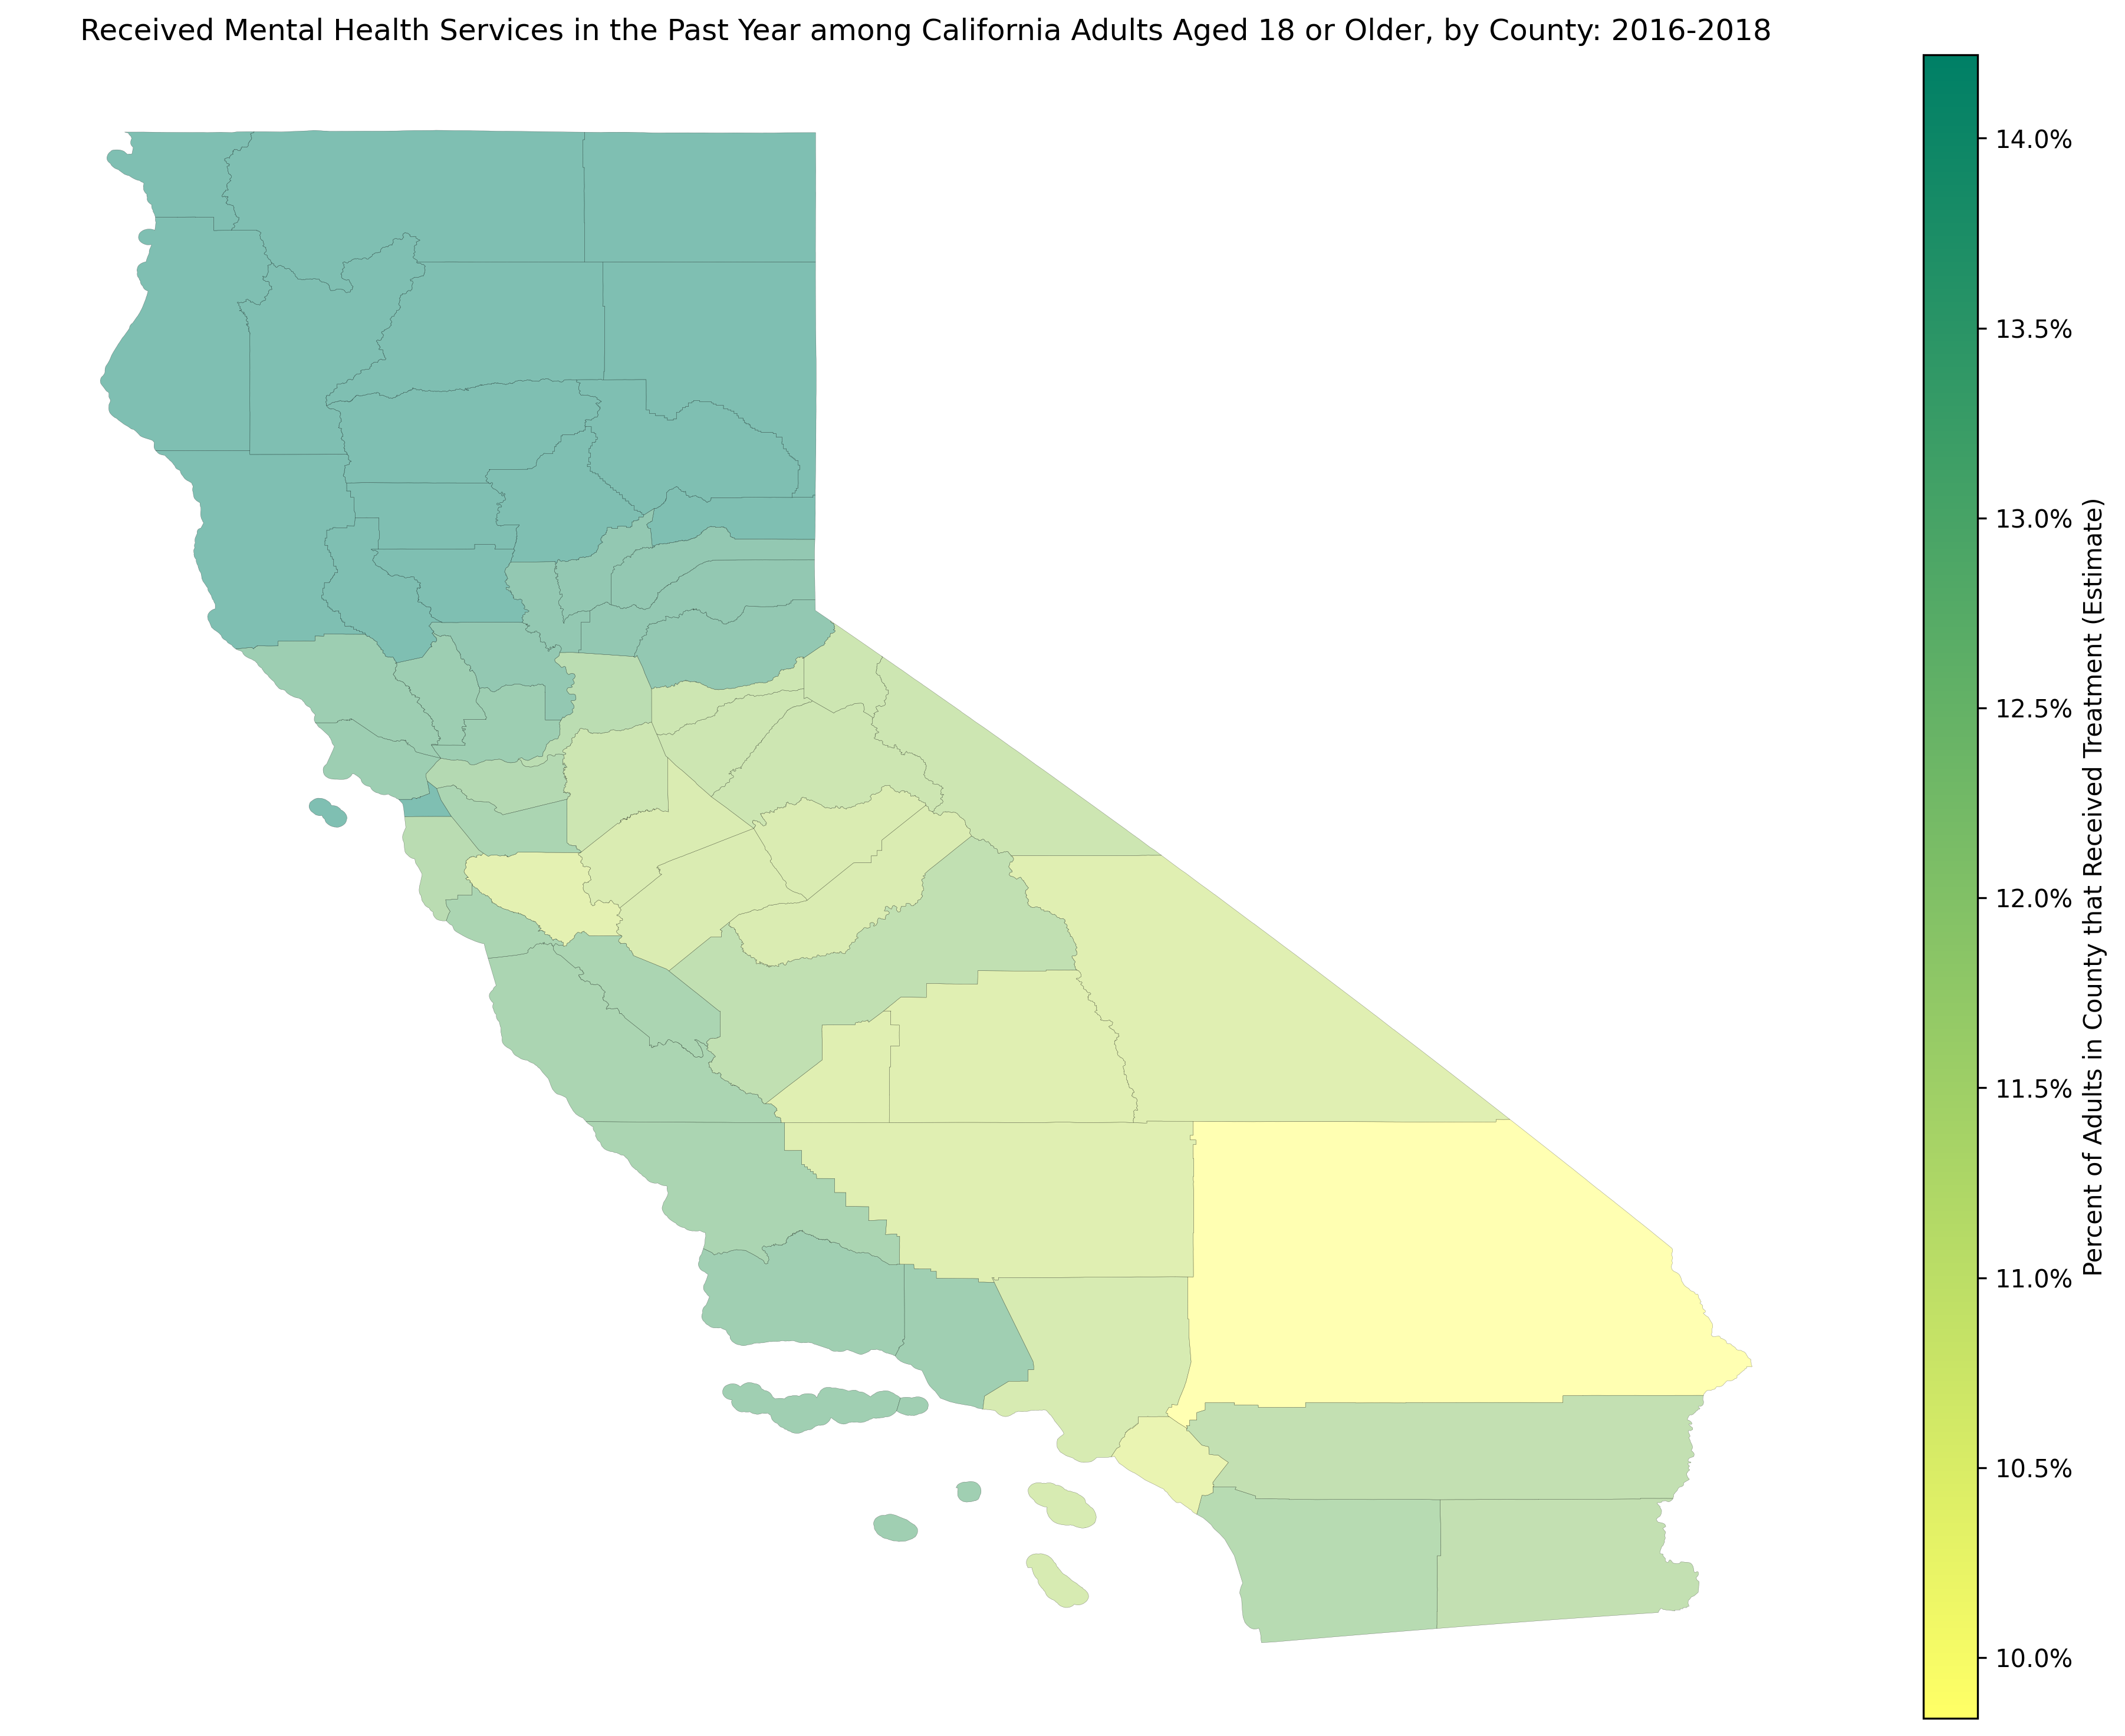

In [171]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter

# Assuming df['received_treatment_estimate'] contains the reordered values

# Create a summer colormap and invert it
summer_inverted = plt.cm.get_cmap('summer').reversed()

f, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False, sharey=False, dpi=300)
f.tight_layout()
plt.title('Received Mental Health Services in the Past Year among California Adults Aged 18 or Older, by County: 2016-2018')
ax.set_axis_off()
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=0.5, alpha=0.5)

# Plot the data
df.plot('received_treatment_estimate', ax=ax, alpha=0.5, cmap=summer_inverted, edgecolor='k', legend=True, cax=cax, linewidth=0.1)

# Manually create the legend
legend = ax.figure.colorbar(ax.collections[0], cax=cax)

# Create a formatter function to append "%" to each label
formatter = FuncFormatter(lambda x, _: f'{x}%')

# Apply the formatter to the legend
legend.ax.yaxis.set_major_formatter(formatter)

legend.set_label('Percent of Adults in County that Received Treatment (Estimate)')

plt.show()


In [317]:

facilities_in_county = {} # counting the number of facilities in each county based on findtreatment data


for county in allcounties:
    facilities_in_county[county] = 0
    # facilities_in_county[county] = []


for id, county in zip(filtered_usa_df['Unnamed: 0'],filtered_usa_df['county']):
    if type(county) == str:  
        facilities_in_county[county] += 1
        # facilities_in_county[county].append(id)
facilities_in_county

{'Butte': 21,
 'Colusa': 2,
 'Del Norte': 3,
 'Glenn': 6,
 'Humboldt': 19,
 'Lake': 6,
 'Lassen': 3,
 'Mendocino': 14,
 'Modoc': 0,
 'Plumas': 1,
 'Shasta': 14,
 'Sierra': 4,
 'Siskiyou': 7,
 'Tehama': 0,
 'Trinity': 3,
 'El Dorado': 16,
 'Nevada': 11,
 'Placer': 23,
 'Sutter': 10,
 'Yolo': 10,
 'Yuba': 7,
 'Sacramento': 82,
 'Marin': 31,
 'Napa': 8,
 'Solano': 21,
 'Sonoma': 22,
 'San Francisco': 57,
 'Santa Clara': 62,
 'Contra Costa': 57,
 'Alameda': 60,
 'San Mateo': 25,
 'Santa Barbara': 36,
 'Ventura': 54,
 'Los Angeles': 604,
 'Alpine': 2,
 'Amador': 4,
 'Calaveras': 6,
 'Mono': 1,
 'San Joaquin': 17,
 'Tuolumne': 5,
 'Imperial': 8,
 'Riverside': 104,
 'Orange': 281,
 'Fresno': 37,
 'San Diego': 178,
 'Inyo': 3,
 'Kern': 34,
 'Kings': 10,
 'Tulare': 17,
 'San Bernardino': 84,
 'Madera': 6,
 'Mariposa': 2,
 'Merced': 13,
 'Stanislaus': 17,
 'Monterey': 24,
 'San Benito': 4,
 'San Luis Obispo': 10,
 'Santa Cruz': 17}

In [323]:
county_order = list(df['NAME'])

# Reorder the county_values dictionary based on the county_order
reordered_facilities_list = {county: facilities_in_county[county] for county in county_order} 

df['num_of_facilities'] = reordered_facilities_list.values()



In [328]:
!pip install tabulate
from tabulate import tabulate
ordered_facilities_in_county = dict(sorted(facilities_in_county.items(), key=lambda item: item[1], reverse=True))



print(tabulate(ordered_facilities_in_county.items(), headers=['County', 'Count'], tablefmt='pretty'))




Defaulting to user installation because normal site-packages is not writeable
+-----------------+-------+
|     County      | Count |
+-----------------+-------+
|   Los Angeles   |  604  |
|     Orange      |  281  |
|    San Diego    |  178  |
|    Riverside    |  104  |
| San Bernardino  |  84   |
|   Sacramento    |  82   |
|   Santa Clara   |  62   |
|     Alameda     |  60   |
|  San Francisco  |  57   |
|  Contra Costa   |  57   |
|     Ventura     |  54   |
|     Fresno      |  37   |
|  Santa Barbara  |  36   |
|      Kern       |  34   |
|      Marin      |  31   |
|    San Mateo    |  25   |
|    Monterey     |  24   |
|     Placer      |  23   |
|     Sonoma      |  22   |
|      Butte      |  21   |
|     Solano      |  21   |
|    Humboldt     |  19   |
|   San Joaquin   |  17   |
|     Tulare      |  17   |
|   Stanislaus    |  17   |
|   Santa Cruz    |  17   |
|    El Dorado    |  16   |
|    Mendocino    |  14   |
|     Shasta      |  14   |
|     Merced      |  13   

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/3056114701.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  summer_inverted = plt.cm.get_cmap('summer').reversed()


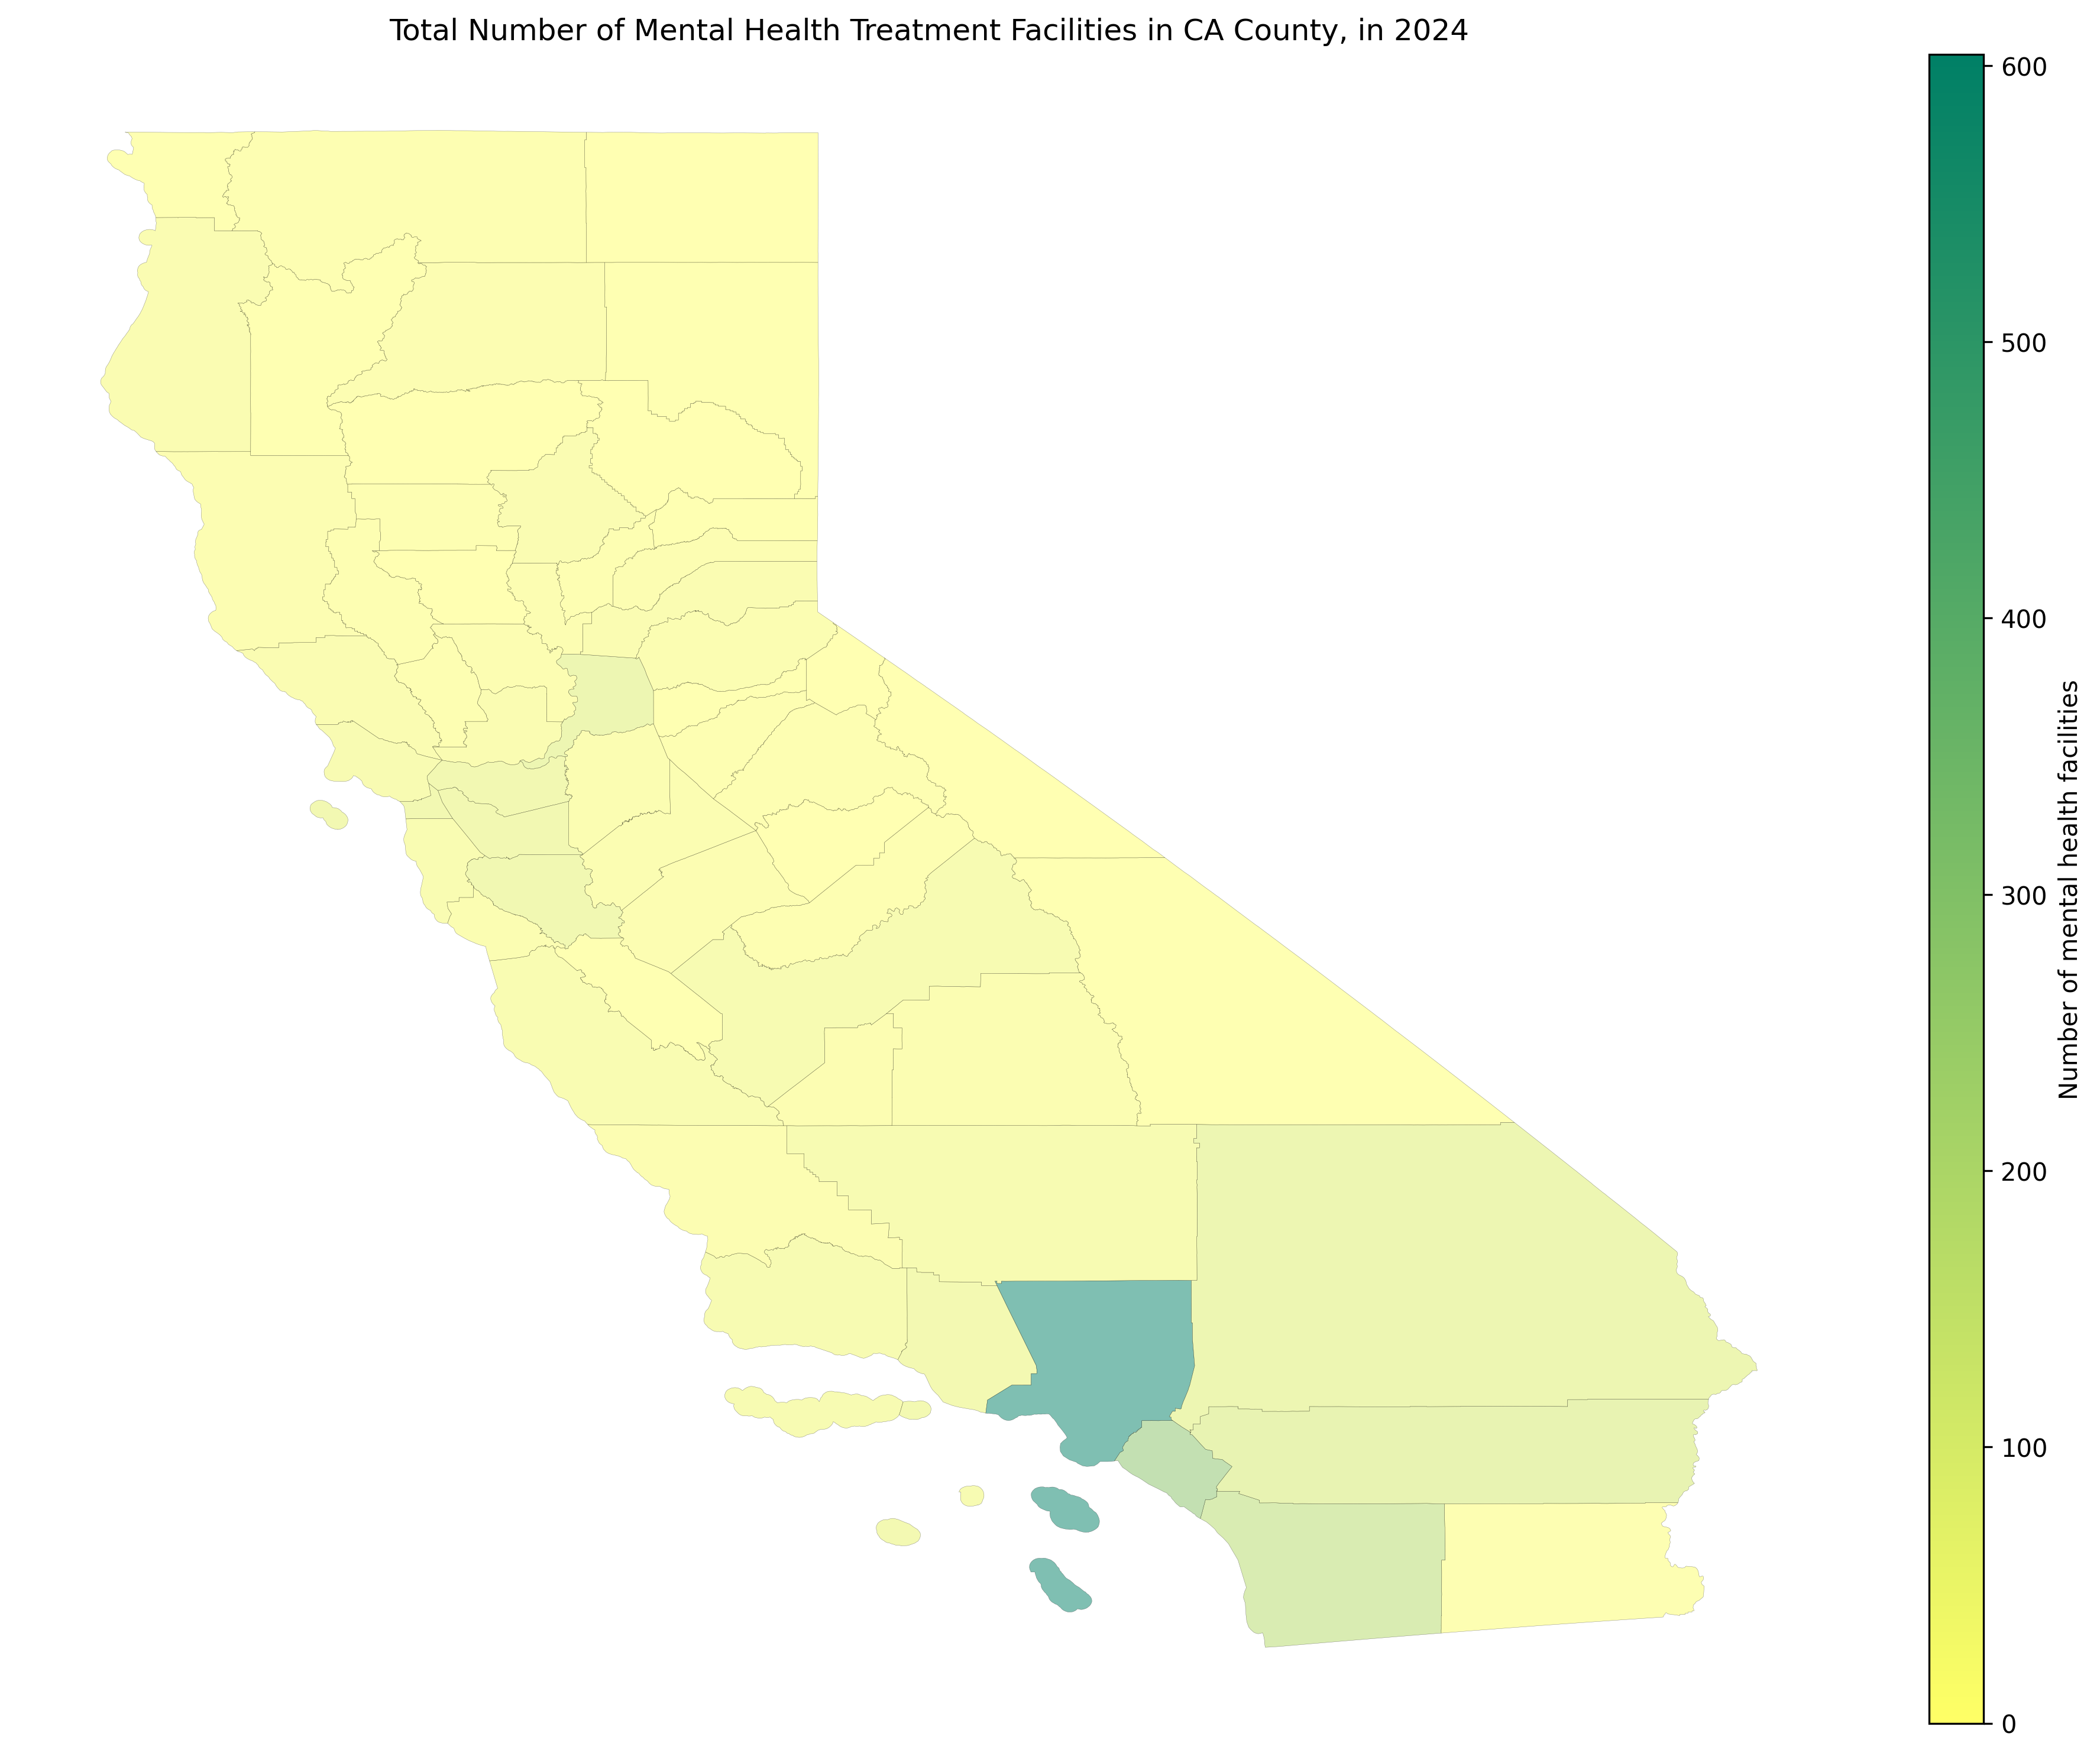

In [319]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter

# Assuming df['received_treatment_estimate'] contains the reordered values

# Create a summer colormap and invert it
summer_inverted = plt.cm.get_cmap('summer').reversed()

f, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False, sharey=False, dpi=300)
f.tight_layout()
plt.title('Total Number of Mental Health Treatment Facilities in CA County, in 2024')
ax.set_axis_off()
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=0.5, alpha=0.5)

# Plot the data
df.plot('num_of_facilities', ax=ax, alpha=0.5, cmap=summer_inverted, edgecolor='k', legend=True, cax=cax, linewidth=0.1)

# Manually create the legend
legend = ax.figure.colorbar(ax.collections[0], cax=cax)

# # Create a formatter function to append "%" to each label
# formatter = FuncFormatter(lambda x, _: f'{x}%')

# # Apply the formatter to the legend
# legend.ax.yaxis.set_major_formatter(formatter)

legend.set_label('Number of mental health facilities')

plt.show()


# interestingly, we have LA with a HUGEEEEE amount of services, which is throwing everything off.


In [320]:
# just looking at all the facilities in california in order

ordered_facilities_in_county = dict(sorted(facilities_in_county.items(), key=lambda item: item[1], reverse=True))

ordered_facilities_in_county

{'Los Angeles': 604,
 'Orange': 281,
 'San Diego': 178,
 'Riverside': 104,
 'San Bernardino': 84,
 'Sacramento': 82,
 'Santa Clara': 62,
 'Alameda': 60,
 'San Francisco': 57,
 'Contra Costa': 57,
 'Ventura': 54,
 'Fresno': 37,
 'Santa Barbara': 36,
 'Kern': 34,
 'Marin': 31,
 'San Mateo': 25,
 'Monterey': 24,
 'Placer': 23,
 'Sonoma': 22,
 'Butte': 21,
 'Solano': 21,
 'Humboldt': 19,
 'San Joaquin': 17,
 'Tulare': 17,
 'Stanislaus': 17,
 'Santa Cruz': 17,
 'El Dorado': 16,
 'Mendocino': 14,
 'Shasta': 14,
 'Merced': 13,
 'Nevada': 11,
 'Sutter': 10,
 'Yolo': 10,
 'Kings': 10,
 'San Luis Obispo': 10,
 'Napa': 8,
 'Imperial': 8,
 'Siskiyou': 7,
 'Yuba': 7,
 'Glenn': 6,
 'Lake': 6,
 'Calaveras': 6,
 'Madera': 6,
 'Tuolumne': 5,
 'Sierra': 4,
 'Amador': 4,
 'San Benito': 4,
 'Del Norte': 3,
 'Lassen': 3,
 'Trinity': 3,
 'Inyo': 3,
 'Colusa': 2,
 'Alpine': 2,
 'Mariposa': 2,
 'Plumas': 1,
 'Mono': 1,
 'Modoc': 0,
 'Tehama': 0}

/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/31175519.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  summer_inverted = plt.cm.get_cmap('summer').reversed()


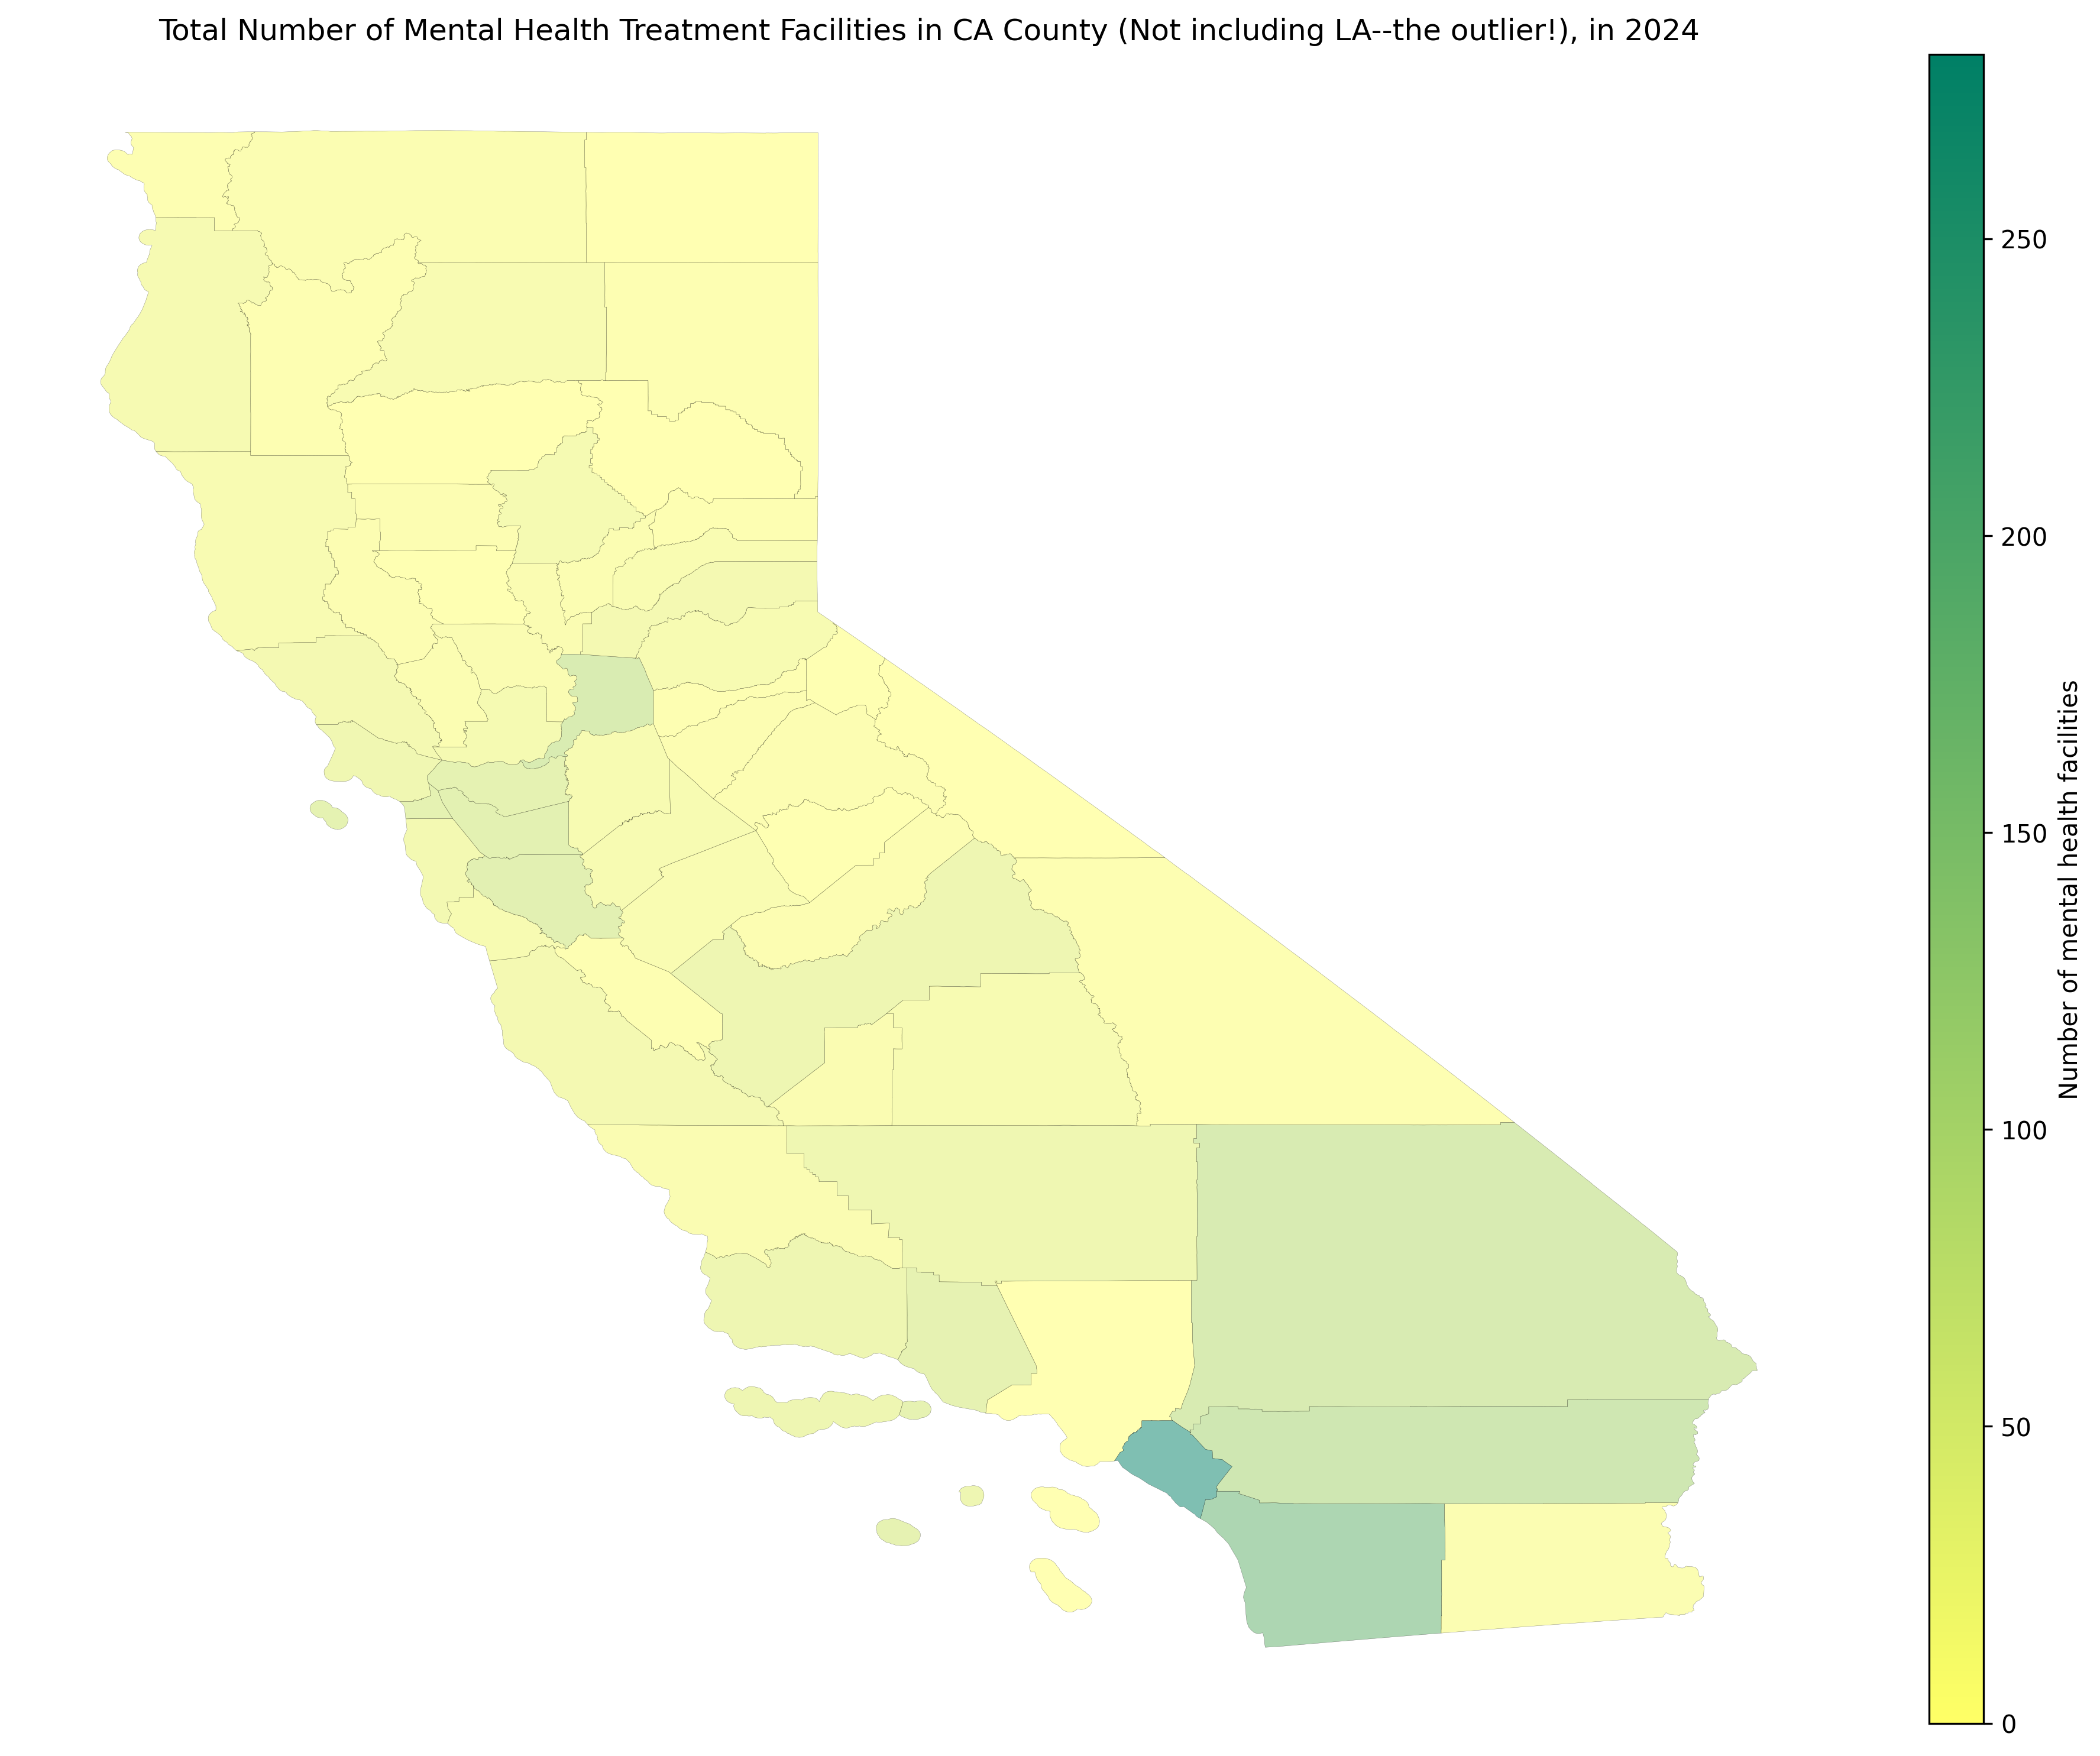

In [322]:
# Reorder the county_values dictionary based on the county_order
new_reordered_facilities_list = reordered_facilities_list
new_reordered_facilities_list['Los Angeles'] = 0

df['num_of_facilities_without_LA'] = new_reordered_facilities_list.values()


import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter

# Assuming df['received_treatment_estimate'] contains the reordered values

# Create a summer colormap and invert it
summer_inverted = plt.cm.get_cmap('summer').reversed()

f, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False, sharey=False, dpi=300)
f.tight_layout()
plt.title('Total Number of Mental Health Treatment Facilities in CA County (Not including LA--the outlier!), in 2024')
ax.set_axis_off()
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=0.5, alpha=0.5)

# Plot the data
df.plot('num_of_facilities_without_LA', ax=ax, alpha=0.5, cmap=summer_inverted, edgecolor='k', legend=True, cax=cax, linewidth=0.1)

# Manually create the legend
legend = ax.figure.colorbar(ax.collections[0], cax=cax)

# # Create a formatter function to append "%" to each label
# formatter = FuncFormatter(lambda x, _: f'{x}%')

# # Apply the formatter to the legend
# legend.ax.yaxis.set_major_formatter(formatter)

legend.set_label('Number of mental health facilities')

plt.show()


# interestingly, we have LA with a HUGEEEEE amount of services, which is throwing everything off.


In [ ]:
INTPTLAT	INTPTLON

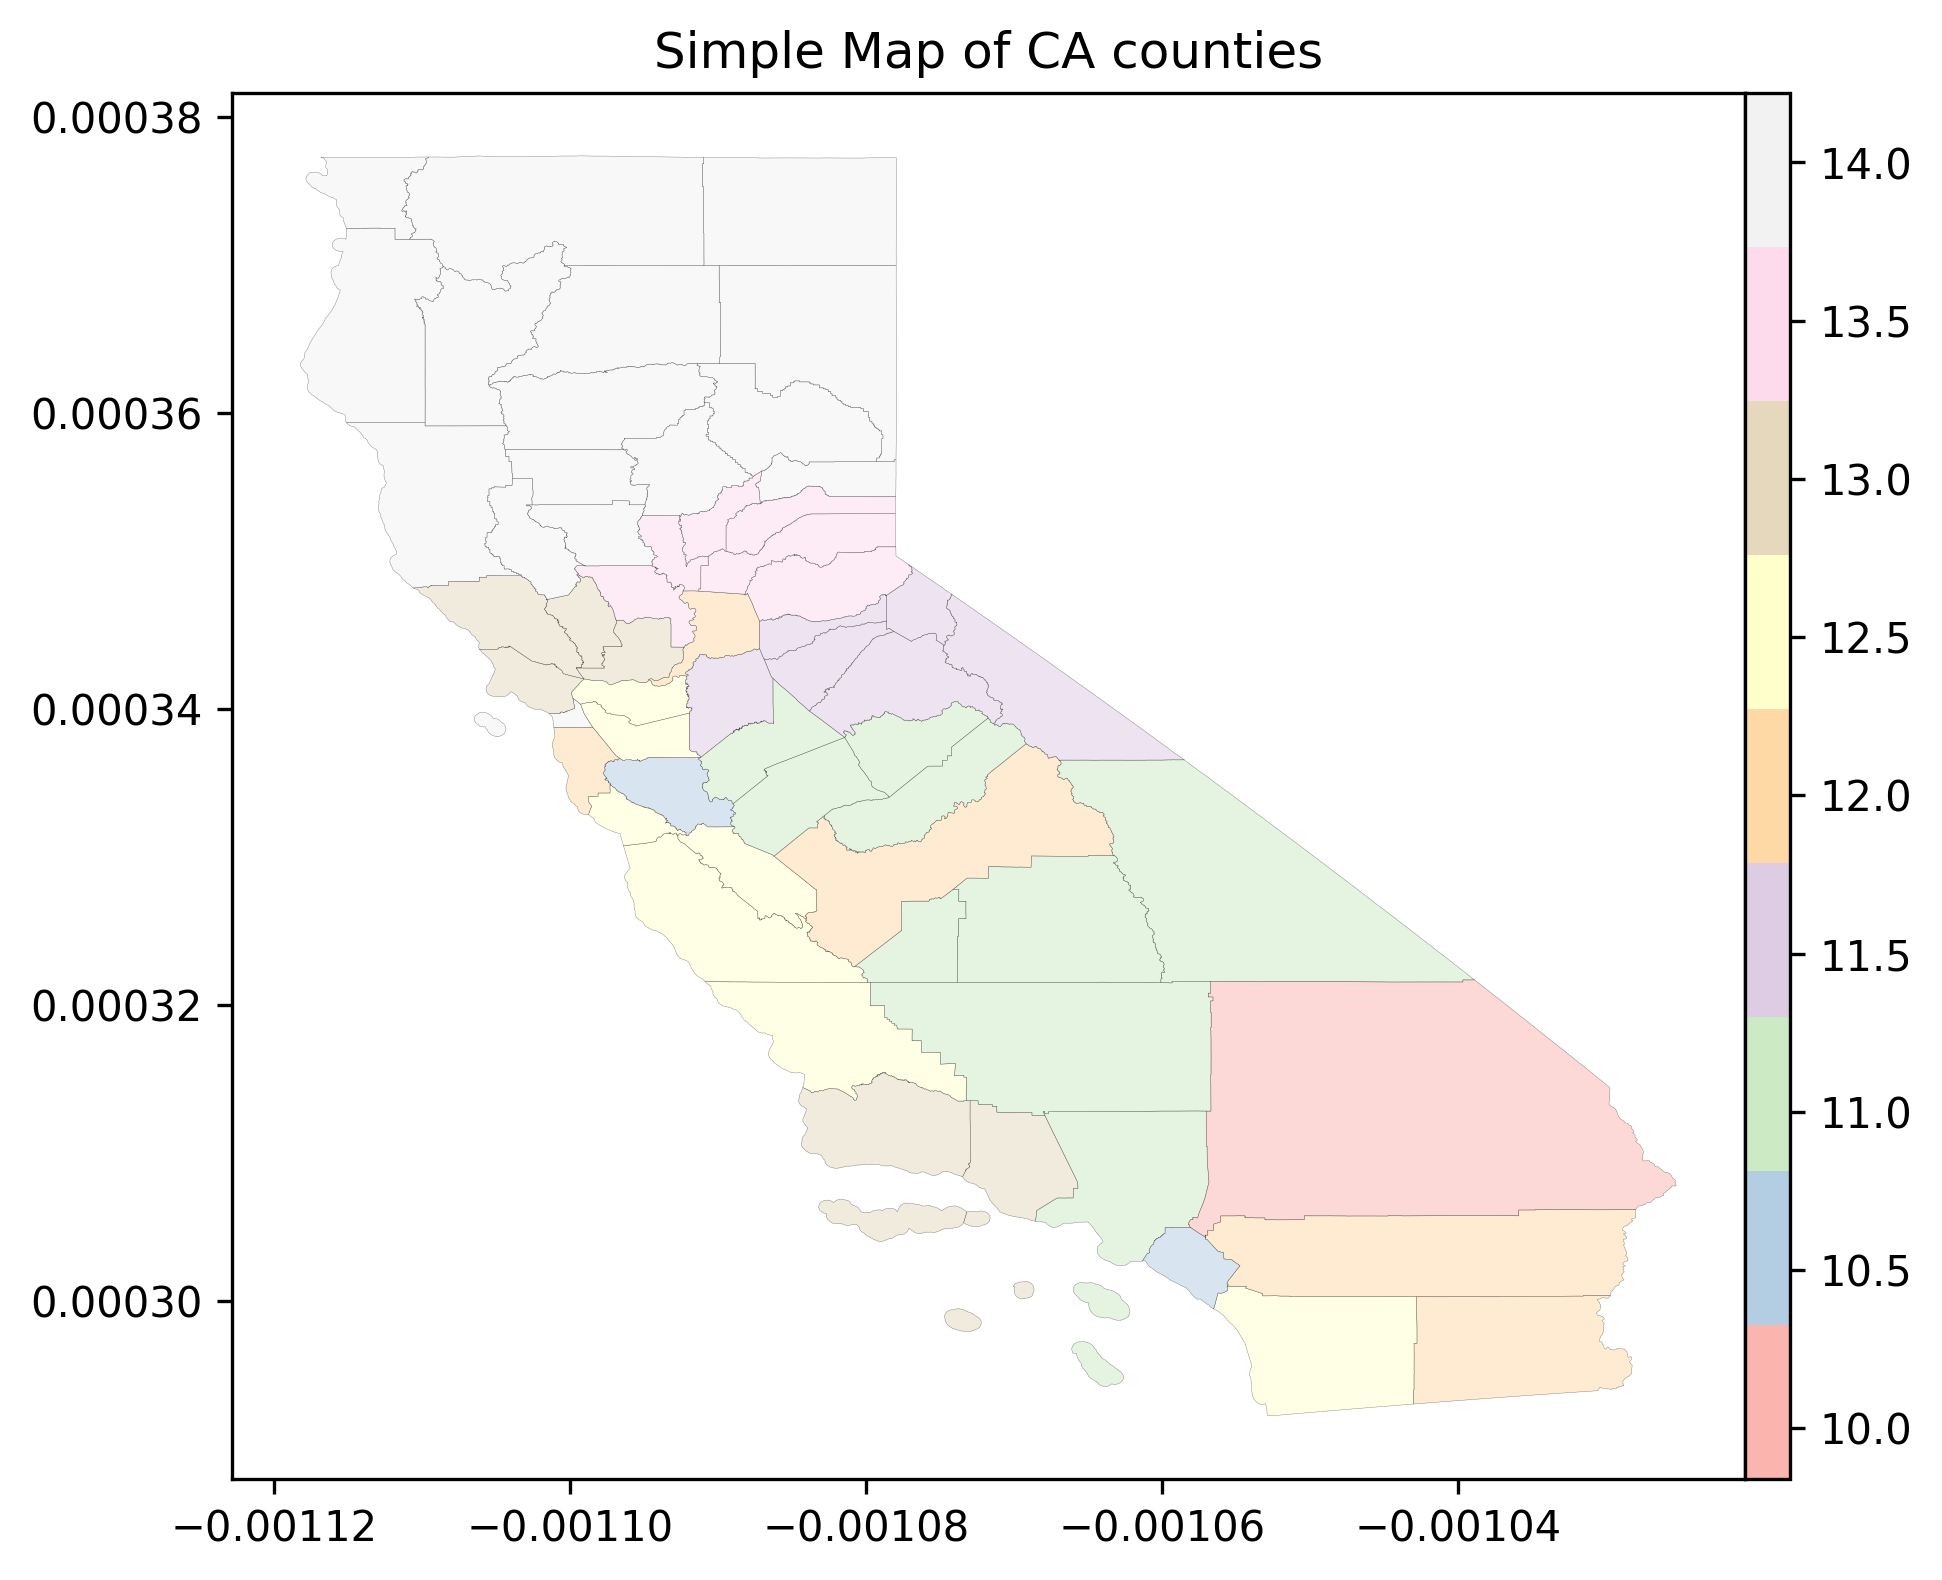

In [180]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Simple Map of CA counties')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)

df.plot('received_treatment_estimate', ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
plt.show()



In [184]:
df['centroid']

0     POINT (-0.00108 0.00036)
1     POINT (-0.00109 0.00035)
2     POINT (-0.00108 0.00031)
3     POINT (-0.00108 0.00034)
4     POINT (-0.00107 0.00031)
5     POINT (-0.00106 0.00031)
6     POINT (-0.00110 0.00035)
7     POINT (-0.00108 0.00032)
8     POINT (-0.00105 0.00030)
9     POINT (-0.00108 0.00035)
10    POINT (-0.00110 0.00034)
11    POINT (-0.00110 0.00034)
12    POINT (-0.00108 0.00034)
13    POINT (-0.00108 0.00037)
14    POINT (-0.00110 0.00035)
15    POINT (-0.00110 0.00037)
16    POINT (-0.00109 0.00033)
17    POINT (-0.00111 0.00037)
18    POINT (-0.00111 0.00035)
19    POINT (-0.00105 0.00033)
20    POINT (-0.00107 0.00034)
21    POINT (-0.00108 0.00034)
22    POINT (-0.00110 0.00034)
23    POINT (-0.00104 0.00031)
24    POINT (-0.00110 0.00034)
25    POINT (-0.00108 0.00035)
26    POINT (-0.00108 0.00035)
27    POINT (-0.00110 0.00035)
28    POINT (-0.00109 0.00035)
29    POINT (-0.00109 0.00033)
30    POINT (-0.00111 0.00037)
31    POINT (-0.00104 0.00030)
32    PO

In [206]:
import geopandas as gpd
from shapely.geometry import Point

crs = {'init': 'epsg:4326'} # crs = coordinate reference system    ​
geometry = [Point(xy) for xy in zip(filtered_usa_df['longitude'], filtered_usa_df['latitude'])]
geo_df = gpd.GeoDataFrame(filtered_usa_df, crs = crs, geometry = geometry)
geo_df['geometry']


/Users/charosa/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


15876    POINT (-114.60911 34.83930)
15884    POINT (-114.61887 34.83094)
16214    POINT (-114.58428 33.57455)
17291    POINT (-115.50049 32.68288)
17294    POINT (-115.49778 32.66791)
                    ...             
23696    POINT (-124.16890 40.80428)
23697    POINT (-124.16899 40.80430)
23700    POINT (-124.15906 41.76197)
23713    POINT (-124.19602 41.75468)
23714    POINT (-124.19894 41.75219)
Name: geometry, Length: 2185, dtype: geometry

In [209]:
!pip install descartes
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [210]:
path = "ca_county_boundaries/ca_county_boundaries.shp"

street_map = gpd.read_file(path)

<Axes: >

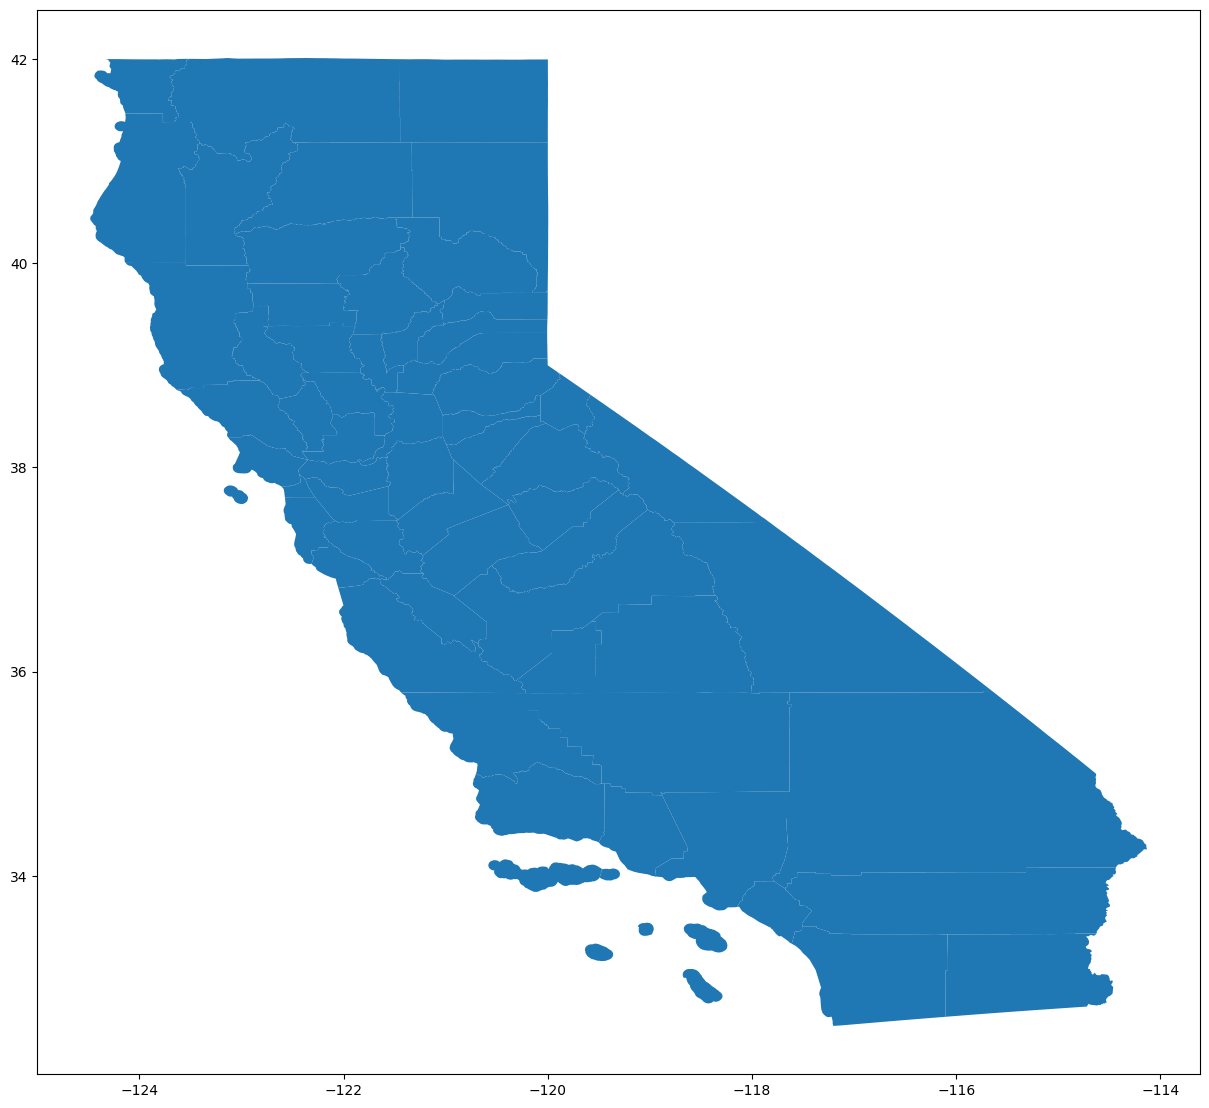

In [211]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

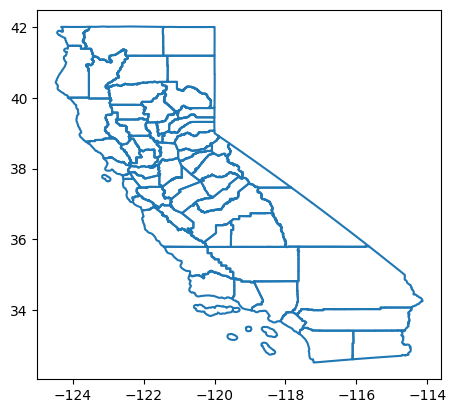

In [221]:
street_map.boundary.plot()
plt.show()

In [212]:
crs = {'init':'epsg:4326'}
filtered_usa_df.head()


Unnamed: 0                                 name1  \
15876       15876             Mental Health Systems Inc   
15884       15884      Needles Behavioral Health Clinic   
16214       16214  Veterans Alcoholic Rehab Prog (VARP)   
17291       17291                    County of Imperial   
17294       17294                    County of Imperial   

                                        name2             street1  street2  \
15876               Needles Center for Change        300 H Street      NaN   
15884               San Bernardino County DBH  1600 Bailey Avenue  Suite 2   
16214                  Metcalf Recovery Ranch    9826 18th Avenue      NaN   
17291  Calexico Adolescent SUD Treatment Prog  101 Hacienda Drive  Suite B   
17294    Calexico Adult SUD Treatment Program  25 East 3rd Street      NaN   

           city state    zip zip4          county  ... Arabic Italian  \
15876   Needles    CA  92363  NaN  San Bernardino  ...    NaN     NaN   
15884   Needles    CA  92363  NaN  San Bernardino  ...    NaN     NaN   
16214    Blythe    CA  92225  NaN       Riverside  ...    NaN     NaN   
17291  Calexico    CA  92231  NaN        Imperial  ...    NaN     NaN   
17294  Calexico    CA  92231  NaN        Imperial  ...    NaN     NaN   

      Japanese Korean Polish  Portuguese  Russian Tagalog  Vietnamese  Ojibwa  
15876      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
15884      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
16214      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
17291      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  
17294      NaN    NaN    NaN         NaN      NaN     NaN         NaN     NaN  

[5 rows x 325 columns]

In [214]:
geometry = [Point(xy) for xy in zip(filtered_usa_df['longitude'], filtered_usa_df['latitude'])]


In [216]:
geo_df = gpd.GeoDataFrame(filtered_usa_df, crs = crs, geometry = geometry)

geo_df.head()


/Users/charosa/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Unnamed: 0                                 name1  \
15876       15876             Mental Health Systems Inc   
15884       15884      Needles Behavioral Health Clinic   
16214       16214  Veterans Alcoholic Rehab Prog (VARP)   
17291       17291                    County of Imperial   
17294       17294                    County of Imperial   

                                        name2             street1  street2  \
15876               Needles Center for Change        300 H Street      NaN   
15884               San Bernardino County DBH  1600 Bailey Avenue  Suite 2   
16214                  Metcalf Recovery Ranch    9826 18th Avenue      NaN   
17291  Calexico Adolescent SUD Treatment Prog  101 Hacienda Drive  Suite B   
17294    Calexico Adult SUD Treatment Program  25 East 3rd Street      NaN   

           city state    zip zip4          county  ... Italian Japanese  \
15876   Needles    CA  92363  NaN  San Bernardino  ...     NaN      NaN   
15884   Needles    CA  92363  NaN  San Bernardino  ...     NaN      NaN   
16214    Blythe    CA  92225  NaN       Riverside  ...     NaN      NaN   
17291  Calexico    CA  92231  NaN        Imperial  ...     NaN      NaN   
17294  Calexico    CA  92231  NaN        Imperial  ...     NaN      NaN   

      Korean Polish Portuguese  Russian  Tagalog Vietnamese  Ojibwa  \
15876    NaN    NaN        NaN      NaN      NaN        NaN     NaN   
15884    NaN    NaN        NaN      NaN      NaN        NaN     NaN   
16214    NaN    NaN        NaN      NaN      NaN        NaN     NaN   
17291    NaN    NaN        NaN      NaN      NaN        NaN     NaN   
17294    NaN    NaN        NaN      NaN      NaN        NaN     NaN   

                          geometry  
15876  POINT (-114.60911 34.83930)  
15884  POINT (-114.61887 34.83094)  
16214  POINT (-114.58428 33.57455)  
17291  POINT (-115.50049 32.68288)  
17294  POINT (-115.49778 32.66791)  

[5 rows x 326 columns]

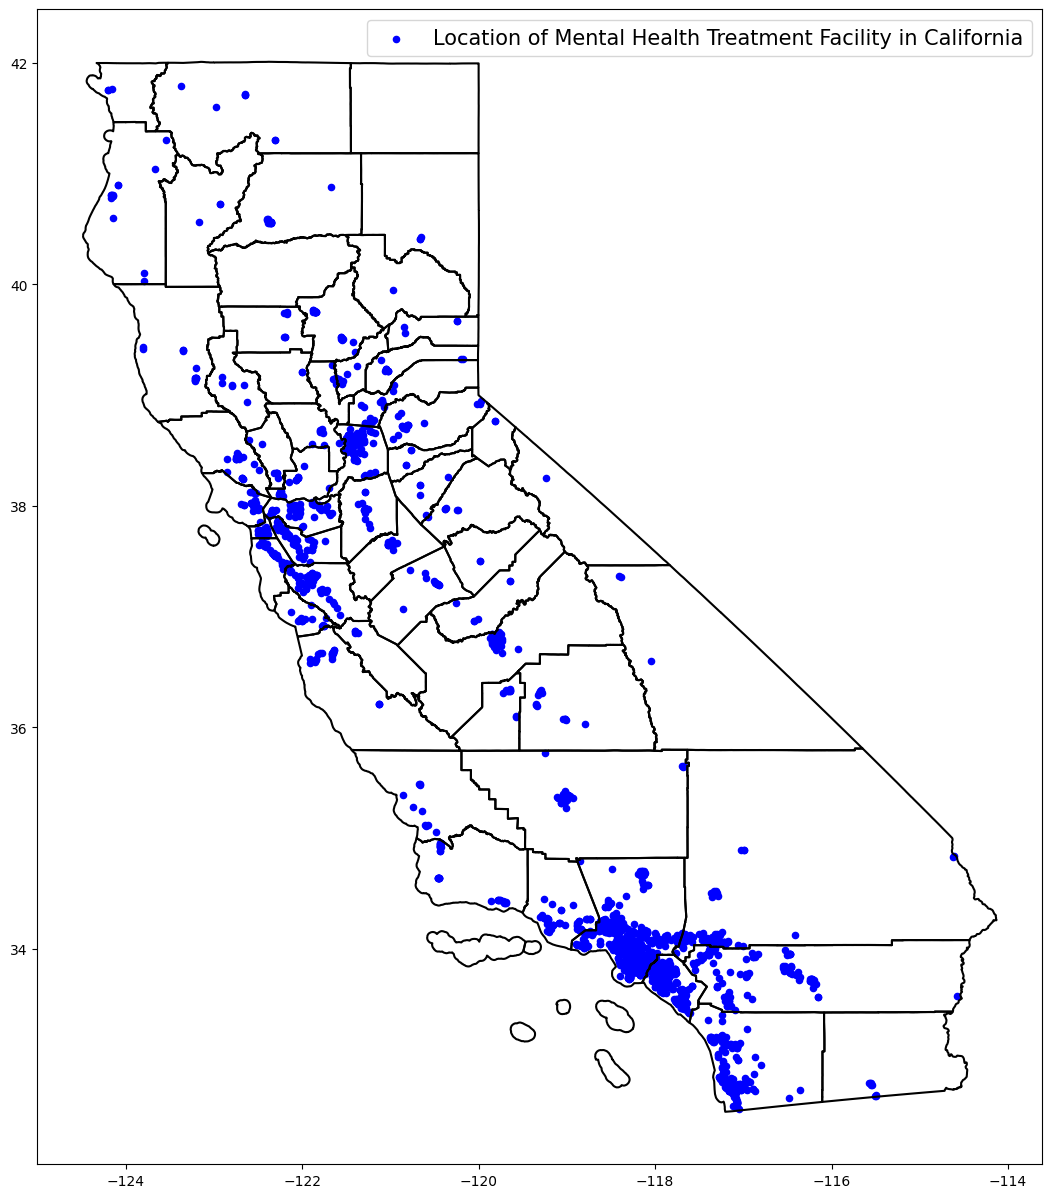

In [229]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.boundary.plot(ax=ax,color='black')
geo_df.plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       marker='o', 
                                       label='Location of Mental Health Treatment Facility in California')

plt.legend(prop={'size':15})


In [232]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
path = "ca_county_boundaries/ca_county_boundaries.shp"
street_map = gpd.read_file(path)


In [235]:
region_names = {
        'California Region 1R': ['Butte', 'Colusa', 'Del Norte', 'Glenn', 'Humboldt', 'Lake', 'Lassen', 'Mendocino', 'Modoc', 'Plumas', 'Shasta', 'Sierra', 'Siskiyou', 'Tehama', 'Trinity'],
        'California Region 2R': ['El Dorado', 'Nevada', 'Placer', 'Sutter', 'Yolo', 'Yuba'],
        'California Region 3R (Sacramento)':['Sacramento'],
        'California Region 4R': ['Marin', 'Napa', 'Solano', 'Sonoma'],
        'California Region 5R (San Francisco)': ['San Francisco'],
        'California Region 6 (Santa Clara)': ['Santa Clara'], # California Region 6 (Santa Clara)
        'California Region 7R (Contra Costa)': ['Contra Costa'],
        'California Region 8R (Alameda)': ['Alameda'],
        'California Region 9R (San Mateo)': ['San Mateo'],
        'California Region 10': ['Santa Barbara', 'Ventura'],
        'California Region 11 (Los Angeles)': ['Los Angeles'], # this has multiple things
        'California Region 12R': ['Alpine', 'Amador', 'Calaveras', 'Mono', 'San Joaquin', 'Tuolumne'],
        'California Regions 13 and 19R': ['Imperial', 'Riverside'],
        'California Region 14 (Orange)': ['Orange'],
        'California Region 15R (Fresno)': ['Fresno'],
        'California Region 16R (San Diego)': ['San Diego'],
        'California Region 17R': ['Inyo', 'Kern', 'Kings', 'Tulare'],
        'California Region 18R (San Bernardino)': ['San Bernardino'],
        'California Region 20R': ['Madera', 'Mariposa', 'Merced', 'Stanislaus'],
        'California Region 21R': ['Monterey', 'San Benito', 'San Luis Obispo', 'Santa Cruz']
}

received_services_df = pd.read_csv('received_services.csv')
received_services_df_filtered = received_services_df[received_services_df['geography'].str.contains('California') & (received_services_df['age_group'] == '18 or Older')] #onlly taking the 18 or older metric, and not other age groups (ie. 26 or older)
received_serv_df_final = received_services_df_filtered[received_services_df_filtered['geography'].isin(region_names.keys())] # filter only for the regions in our keys

county_values = {} # this is a dictionary of every california county and there "received treatment" score based on the samhsa data
for region, estimate in zip(received_serv_df_final['geography'], received_serv_df_final['estimate']):
    for county in region_names[region]:

        county_values[county] = round(float(estimate) * 100, 2) 


# Reorder the county_values dictionary based on the county_order
county_order = list(street_map['NAME'])
reordered_received_list = {county: county_values[county] for county in county_order} 
# reordered_received_list
street_map['received_percent'] = reordered_received_list.values()



/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/3463625354.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  summer_inverted = plt.cm.get_cmap('Wistia')


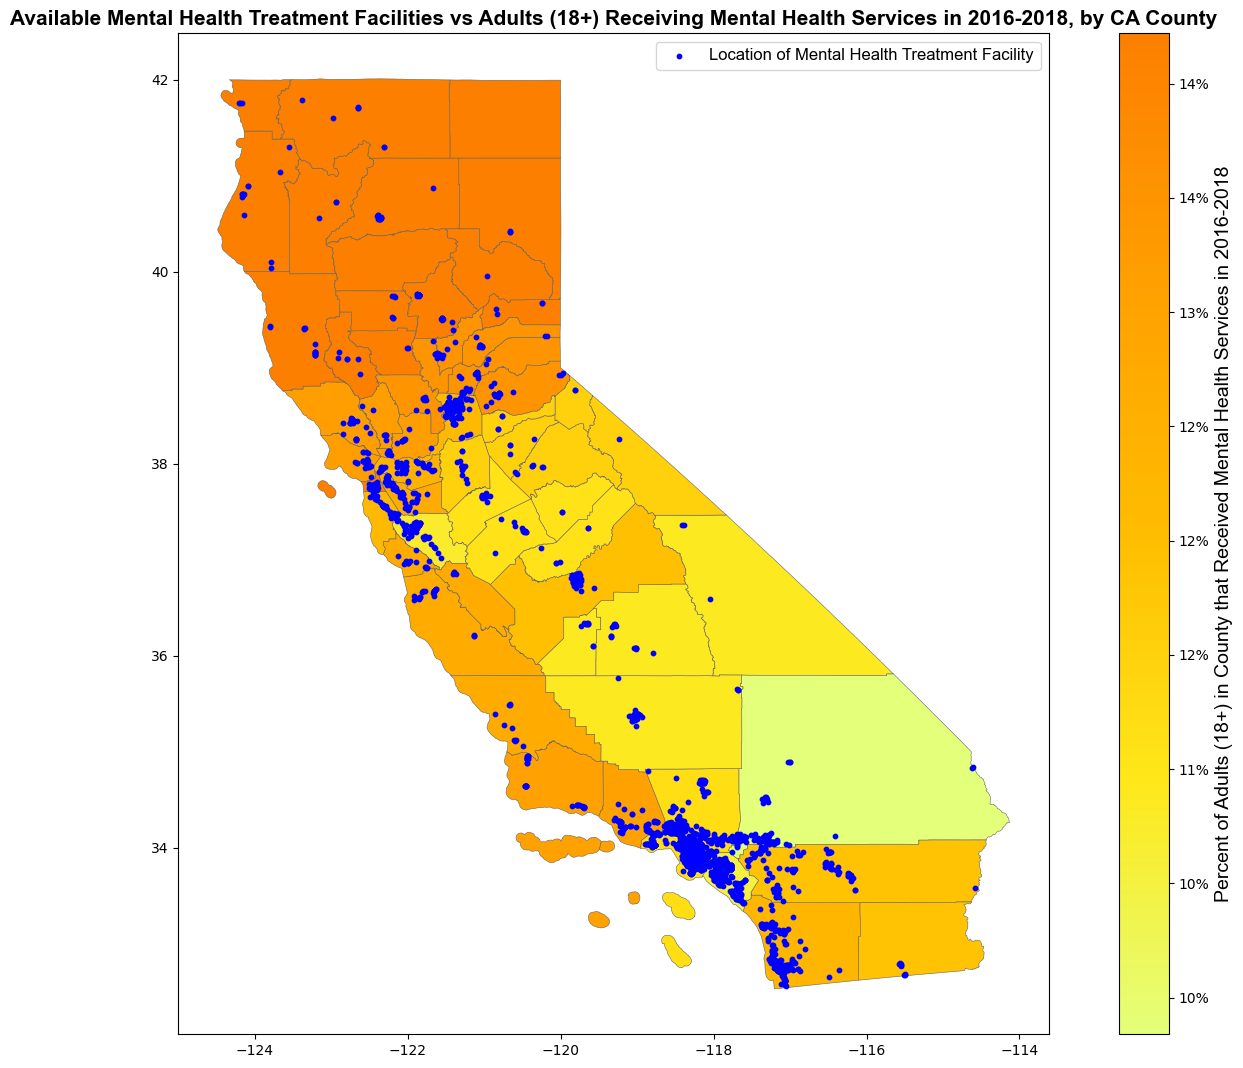

In [303]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define font properties
title_font = {'fontsize': 15, 'fontweight': 'bold', 'fontfamily': 'Arial'}
legend_font = {'size': 12, 'family': 'Arial'}
colorbar_font = {'size': 14, 'family': 'Arial'}

# Create a summer colormap and invert it
summer_inverted = plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(1, figsize=(18, 13))

# Plot the street map with the received_percent column
street_map.plot(column="received_percent", cmap=summer_inverted, linewidth=0.4, ax=ax, legend=False, edgecolor=".4")

# Plot the location of Mental Health Treatment Facility
geo_df.plot(ax=ax, markersize=10, color='blue', marker='o', label='Location of Mental Health Treatment Facility')

# Get the colorbar from the plot and customize legend ticks to append the percent sign
cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax, format='%.0f%%')
cbar.set_label('Percent of Adults (18+) in County that Received Mental Health Services in 2016-2018', **colorbar_font)

# Set legend properties
legend = ax.legend(prop=legend_font)

# Set plot title with specified font properties
ax.set_title('Available Mental Health Treatment Facilities vs Adults (18+) Receiving Mental Health Services in 2016-2018, by CA County', fontdict=title_font)

plt.show()


/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_42534/1004854077.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  summer_inverted = plt.cm.get_cmap('Wistia')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


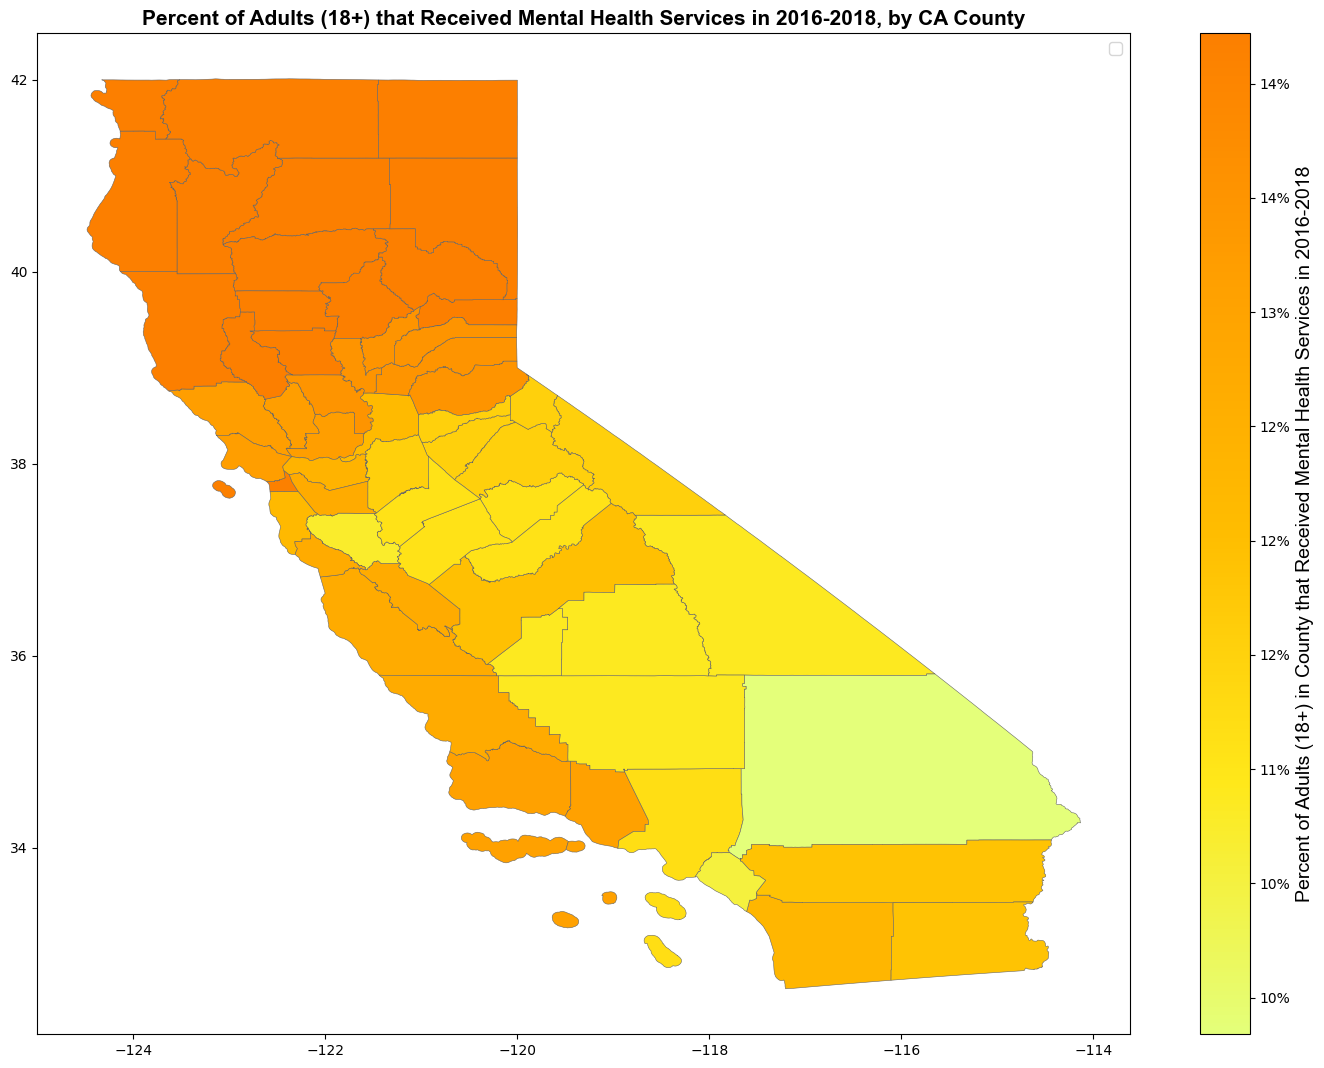

In [315]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define font properties
title_font = {'fontsize': 15, 'fontweight': 'bold', 'fontfamily': 'Arial'}
legend_font = {'size': 12, 'family': 'Arial'}
colorbar_font = {'size': 14, 'family': 'Arial'}

# Create a summer colormap and invert it
summer_inverted = plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(1, figsize=(18, 13))

# Plot the street map with the received_percent column
street_map.plot(column="received_percent", cmap=summer_inverted, linewidth=0.4, ax=ax, legend=False, edgecolor=".4")

# Plot the location of Mental Health Treatment Facility
# geo_df.plot(ax=ax, markersize=10, color='blue', marker='o', label='Location of Mental Health Treatment Facility')

# Get the colorbar from the plot and customize legend ticks to append the percent sign
cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax, format='%.0f%%')
cbar.set_label('Percent of Adults (18+) in County that Received Mental Health Services in 2016-2018', **colorbar_font)

# Set legend properties
legend = ax.legend(prop=legend_font)

# Set plot title with specified font properties
ax.set_title('Percent of Adults (18+) that Received Mental Health Services in 2016-2018, by CA County', fontdict=title_font)

plt.show()
